In [1]:
import sys
sys.path.append("..")

import tensorflow as tf
#tf.enable_eager_execution()

import numpy as np

from src.models.CondRNN_GANN import CondRNN_GANN
from src.input.NormalizedFlareAccessor import NormalizedFlareAccessor
from src.input.SyntheticSineAccessor import SyntheticSineAccessor
from src.evaluation.AdversarialAccuracy import AdversarialAccuracy

In [2]:
baseDir = "/data/SHARPS/BERKAY/v0.7/new-data-folds/instances_O12L0P24/"
folds = ["partition1_minmax", "partition2_minmax", "partition3_minmax", "partition4_minmax", "partition5_minmax"]
# folds = ["partition1_zscore", "partition2_zscore", "partition3_zscore", "partition4_zscore", "partition5_zscore"]
outDir = "/data/SHARPS/gann-proj"
snapshotDir = "/data/SHARPS/gann-proj/model"
# params = ['Timestamp', 'ABSNJZH', 'MEANPOT', 'MEANGBT', 'TOTUSJH']
params = ['Timestamp', 'TOTUSJH']

seqLength = 60
numFeatures = len(params)-1
latentDim = 5
conditionDim = 1 
lstmCellDim = 100
batchSize = 64
learn_rate = 5e-2
trainEpochs = 500
trainIter = 50

tmp_idx = 40 # 218
tmp_lr = 5e-2
tmp_bts = 28
tmp_lstmCellDim = 100
seqLength = 30
# tmp_snapshotDir = snapshotDir + '_sine_p' + str(numFeatures) + '_' + str(tmp_idx) + '_' + str(tmp_lr) + '_' + str(tmp_bts) + '_' + str(tmp_lstmCellDim)
tmp_snapshotDir = snapshotDir + '_sine_' +  str(tmp_idx) + '_' + str(tmp_lr) + '_' + str(tmp_bts) + '_' + str(tmp_lstmCellDim)

In [3]:
def dataGenerator():
    # accessor = NormalizedFlareAccessor(outDir, folds, params[1:], seqLength)
    accessor = SyntheticSineAccessor(seqLength, 1)
    accessorIter = iter(accessor)
    for nextFrame in accessorIter:
        nextFrame = nextFrame.to_numpy()
        yield nextFrame

In [4]:
ds = tf.data.Dataset.from_generator(dataGenerator, output_types=tf.float32, 
                                            output_shapes = (seqLength, numFeatures+1), ).cache()
ds = ds.shuffle(1000, reshuffle_each_iteration=True)
ds = ds.repeat()
ds = ds.batch(tmp_bts)# .prefetch(2)

In [5]:
gann = CondRNN_GANN(ds, tmp_bts, seqLength, numFeatures, latentDim, conditionDim, tmp_lstmCellDim, tmp_lr, trainEpochs, trainIter, tmp_snapshotDir)

Initializing from scratch.


/data/SHARPS/gann-proj/loss_traces/loss_trace_40.txt
Viewing samples at 0:
(28, 30, 1)


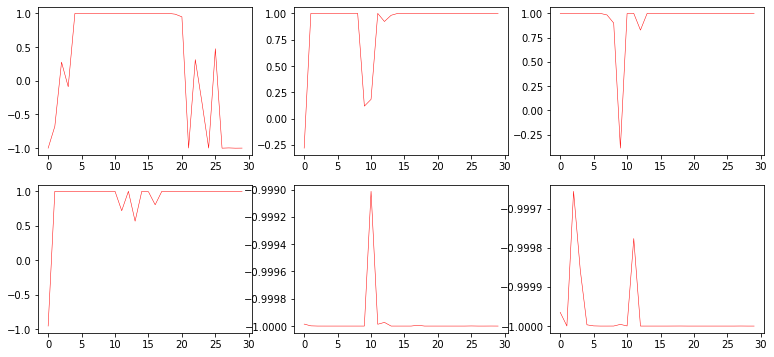

Saved checkpoint for step 2: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-1
** step - 0 : gen loss= 13.23, disc loss= 9.18
** step - 1 : gen loss= 18.06, disc loss= 0.00
** step - 2 : gen loss= 18.58, disc loss= 0.00
Viewing samples at 3:
(28, 30, 1)


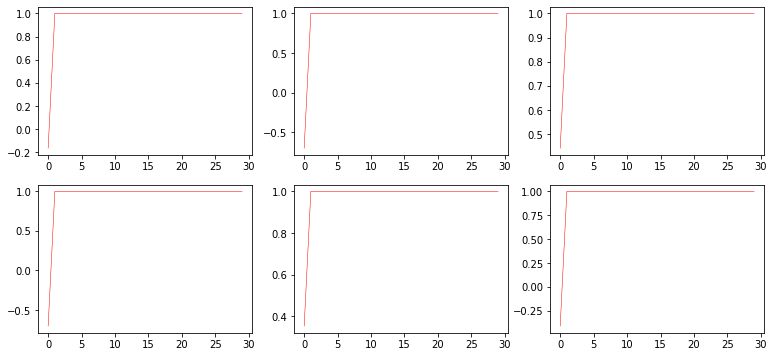

** step - 3 : gen loss= 18.97, disc loss= 0.00
** step - 4 : gen loss= 1.60, disc loss= 2.93
Saved checkpoint for step 7: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-2
** step - 5 : gen loss= 16.45, disc loss= 0.00
Viewing samples at 6:
(28, 30, 1)


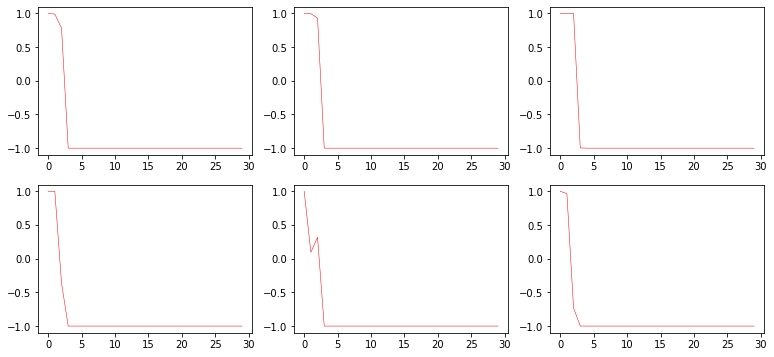

** step - 6 : gen loss= 18.32, disc loss= 0.00
** step - 7 : gen loss= 18.98, disc loss= 0.00
** step - 8 : gen loss= 19.43, disc loss= 0.00
Viewing samples at 9:
(28, 30, 1)


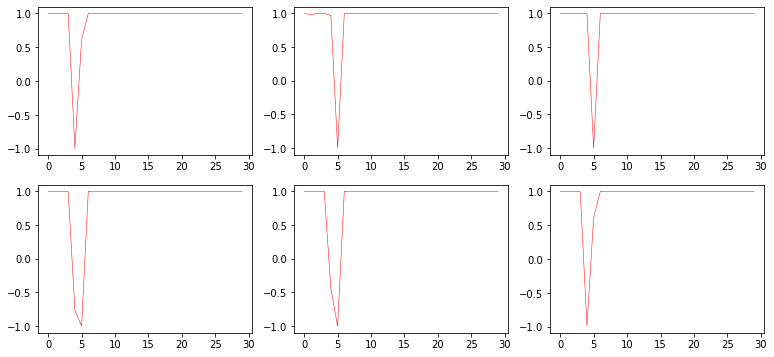

** step - 9 : gen loss= 17.77, disc loss= 0.00
Saved checkpoint for step 12: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-3
** step - 10 : gen loss= 18.73, disc loss= 0.00
** step - 11 : gen loss= 19.16, disc loss= 0.00
Viewing samples at 12:
(28, 30, 1)


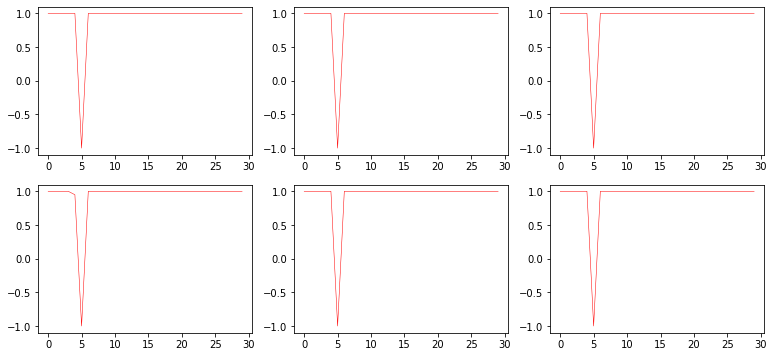

** step - 12 : gen loss= 20.02, disc loss= 0.00
** step - 13 : gen loss= 20.15, disc loss= 0.00
** step - 14 : gen loss= 20.27, disc loss= 0.00
Viewing samples at 15:
(28, 30, 1)


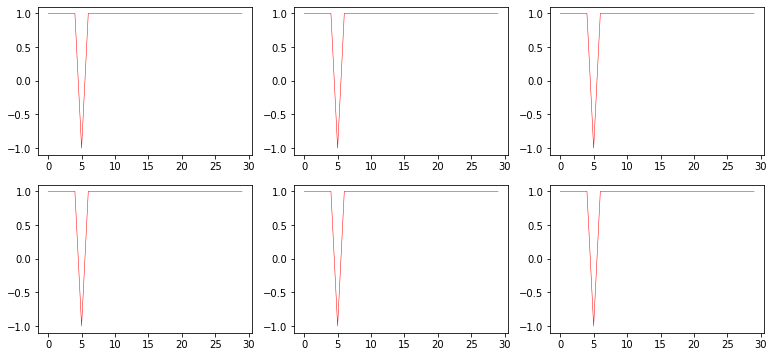

Saved checkpoint for step 17: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-4
** step - 15 : gen loss= 20.38, disc loss= 0.00
** step - 16 : gen loss= 20.48, disc loss= 0.00
** step - 17 : gen loss= 20.58, disc loss= 0.00
Viewing samples at 18:
(28, 30, 1)


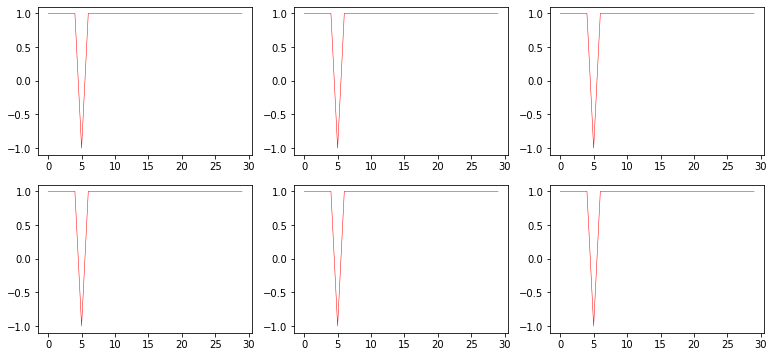

** step - 18 : gen loss= 20.66, disc loss= 0.00
** step - 19 : gen loss= 20.74, disc loss= 0.00
Saved checkpoint for step 22: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-5
** step - 20 : gen loss= 20.82, disc loss= 0.00
Viewing samples at 21:
(28, 30, 1)


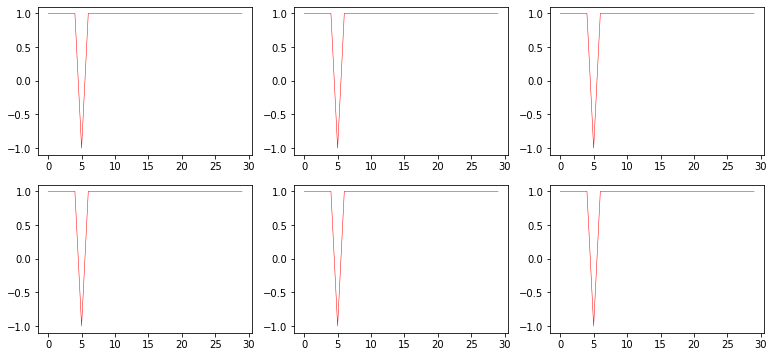

** step - 21 : gen loss= 20.89, disc loss= 0.00
** step - 22 : gen loss= 20.95, disc loss= 0.00
** step - 23 : gen loss= 21.02, disc loss= 0.00
Viewing samples at 24:
(28, 30, 1)


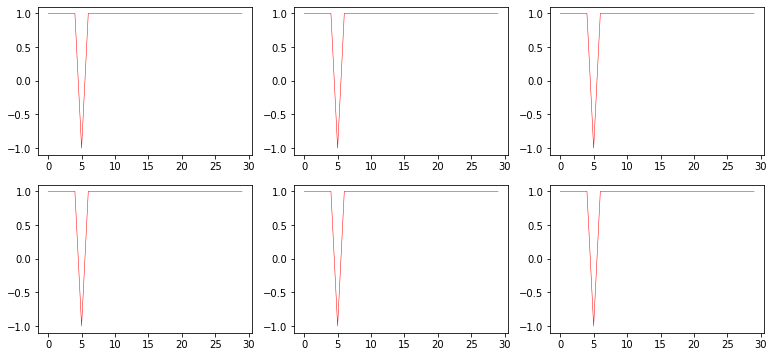

** step - 24 : gen loss= 21.08, disc loss= 0.00
Saved checkpoint for step 27: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-6
** step - 25 : gen loss= 21.13, disc loss= 0.00
** step - 26 : gen loss= 21.18, disc loss= 0.00
Viewing samples at 27:
(28, 30, 1)


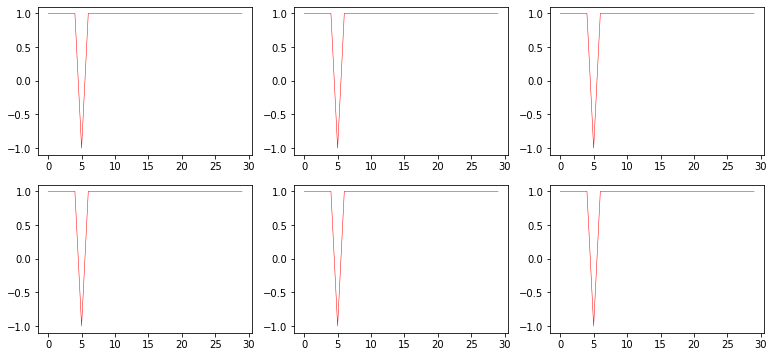

** step - 27 : gen loss= 21.23, disc loss= 0.00
** step - 28 : gen loss= 21.28, disc loss= 0.00
** step - 29 : gen loss= 21.33, disc loss= 0.00
Viewing samples at 30:
(28, 30, 1)


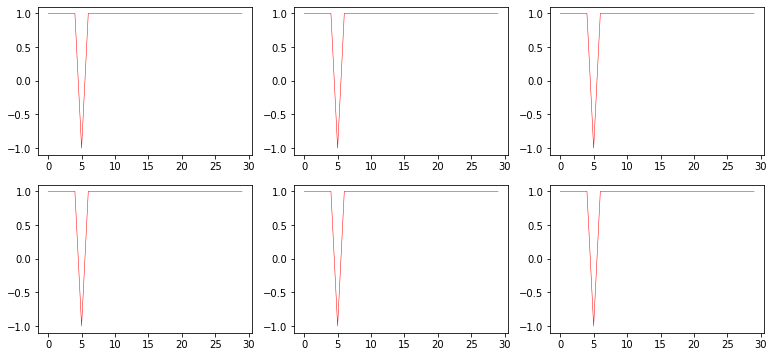

Saved checkpoint for step 32: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-7
** step - 30 : gen loss= 21.37, disc loss= 0.00
** step - 31 : gen loss= 21.41, disc loss= 0.00
** step - 32 : gen loss= 21.45, disc loss= 0.00
Viewing samples at 33:
(28, 30, 1)


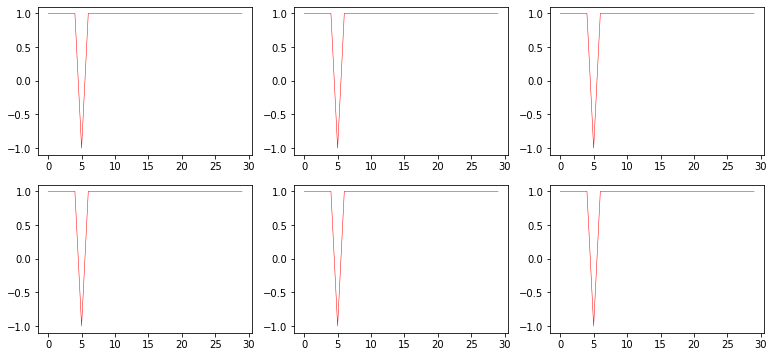

** step - 33 : gen loss= 21.49, disc loss= 0.00
** step - 34 : gen loss= 21.53, disc loss= 0.00
Saved checkpoint for step 37: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-8
** step - 35 : gen loss= 21.57, disc loss= 0.00
Viewing samples at 36:
(28, 30, 1)


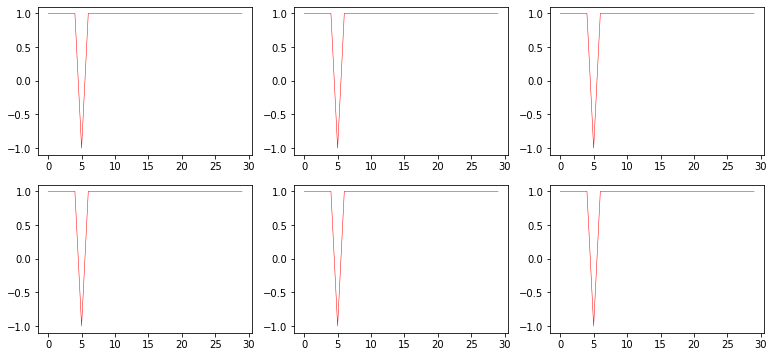

** step - 36 : gen loss= 21.60, disc loss= 0.00
** step - 37 : gen loss= 21.64, disc loss= 0.00
** step - 38 : gen loss= 21.67, disc loss= 0.00
Viewing samples at 39:
(28, 30, 1)


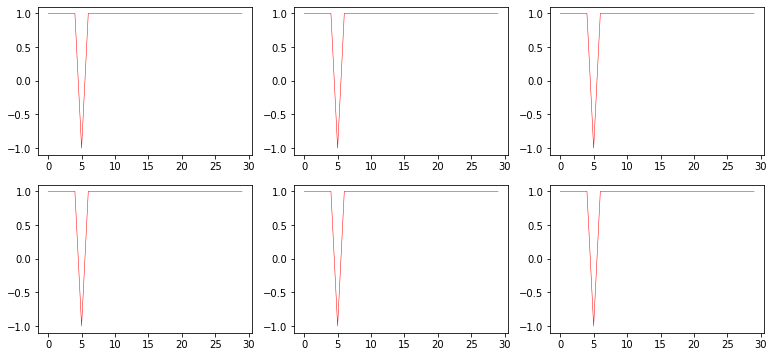

** step - 39 : gen loss= 21.70, disc loss= 0.00
Saved checkpoint for step 42: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-9
** step - 40 : gen loss= 21.73, disc loss= 0.00
** step - 41 : gen loss= 21.76, disc loss= 0.00
Viewing samples at 42:
(28, 30, 1)


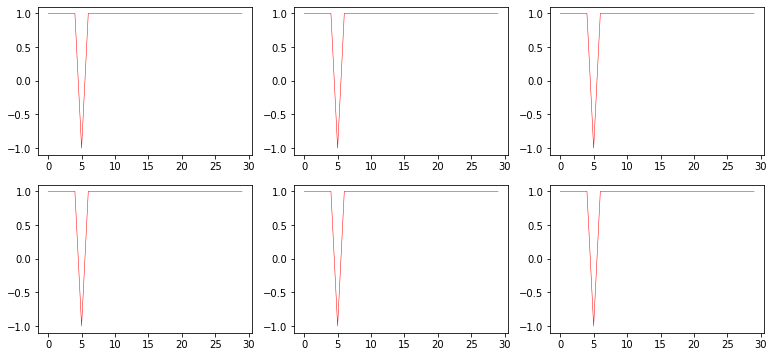

** step - 42 : gen loss= 21.79, disc loss= 0.00
** step - 43 : gen loss= 21.82, disc loss= 0.00
** step - 44 : gen loss= 21.85, disc loss= 0.00
Viewing samples at 45:
(28, 30, 1)


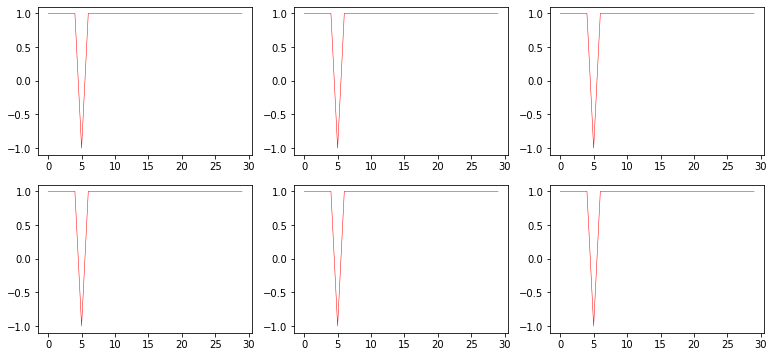

Saved checkpoint for step 47: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-10
** step - 45 : gen loss= 21.88, disc loss= 0.00
** step - 46 : gen loss= 21.90, disc loss= 0.00
** step - 47 : gen loss= 21.93, disc loss= 0.00
Viewing samples at 48:
(28, 30, 1)


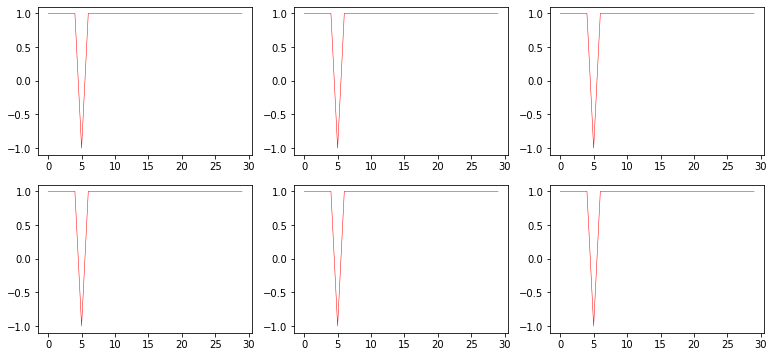

** step - 48 : gen loss= 21.96, disc loss= 0.00
** step - 49 : gen loss= 21.98, disc loss= 0.00
Saved checkpoint for step 52: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-11
** step - 50 : gen loss= 22.01, disc loss= 0.00
Viewing samples at 51:
(28, 30, 1)


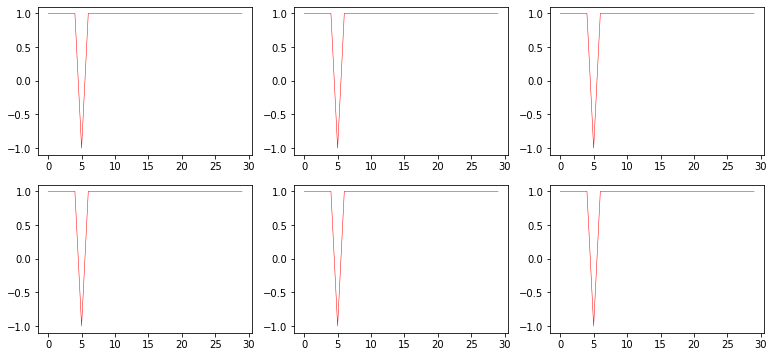

** step - 51 : gen loss= 22.03, disc loss= 0.00
** step - 52 : gen loss= 22.05, disc loss= 0.00
** step - 53 : gen loss= 22.08, disc loss= 0.00
Viewing samples at 54:
(28, 30, 1)


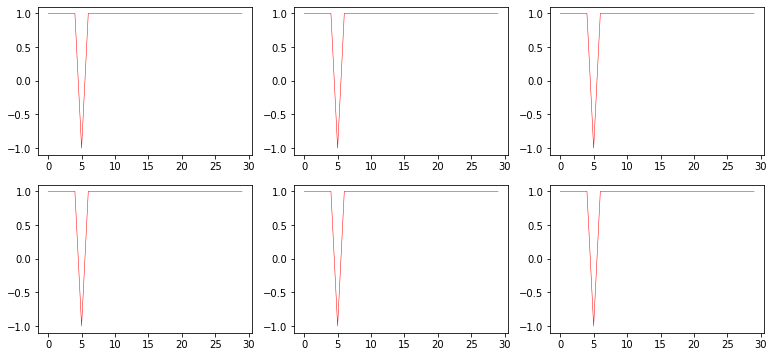

** step - 54 : gen loss= 22.10, disc loss= 0.00
Saved checkpoint for step 57: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-12
** step - 55 : gen loss= 22.12, disc loss= 0.00
** step - 56 : gen loss= 22.14, disc loss= 0.00
Viewing samples at 57:
(28, 30, 1)


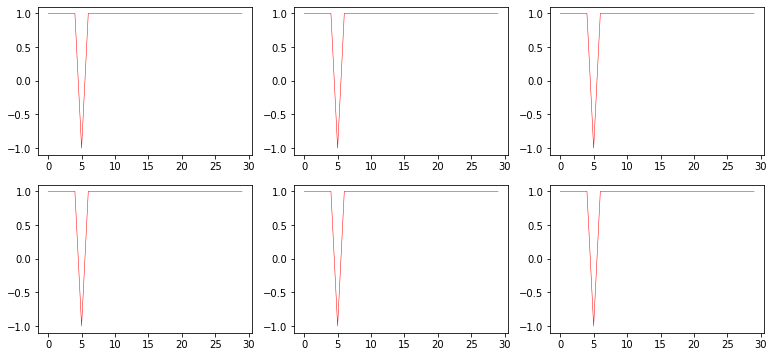

** step - 57 : gen loss= 22.16, disc loss= 0.00
** step - 58 : gen loss= 22.19, disc loss= 0.00
** step - 59 : gen loss= 22.21, disc loss= 0.00
Viewing samples at 60:
(28, 30, 1)


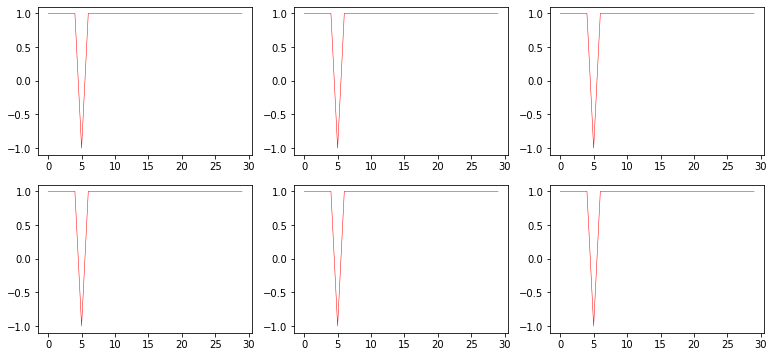

Saved checkpoint for step 62: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-13
** step - 60 : gen loss= 22.23, disc loss= 0.00
** step - 61 : gen loss= 22.25, disc loss= 0.00
** step - 62 : gen loss= 22.27, disc loss= 0.00
Viewing samples at 63:
(28, 30, 1)


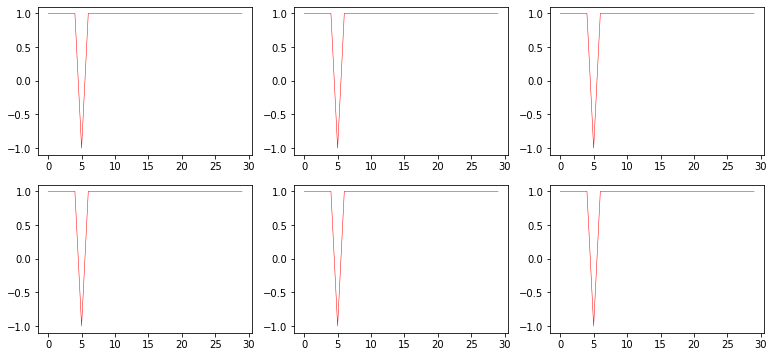

** step - 63 : gen loss= 22.29, disc loss= 0.00
** step - 64 : gen loss= 22.30, disc loss= 0.00
Saved checkpoint for step 67: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-14
** step - 65 : gen loss= 22.32, disc loss= 0.00
Viewing samples at 66:
(28, 30, 1)


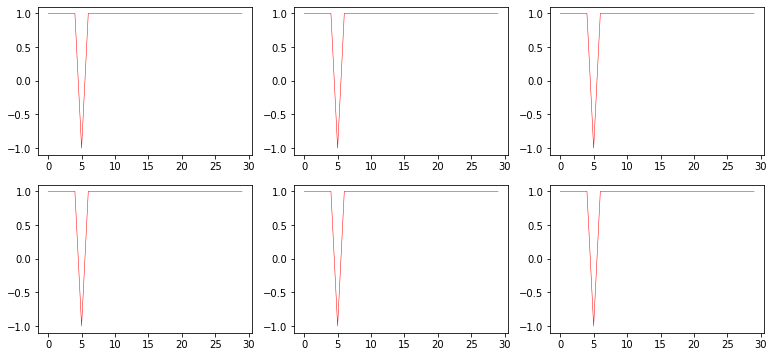

** step - 66 : gen loss= 22.34, disc loss= 0.00
** step - 67 : gen loss= 22.36, disc loss= 0.00
** step - 68 : gen loss= 22.38, disc loss= 0.00
Viewing samples at 69:
(28, 30, 1)


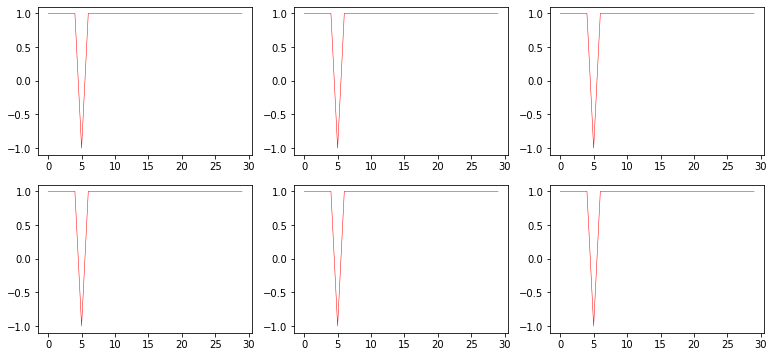

** step - 69 : gen loss= 22.40, disc loss= 0.00
Saved checkpoint for step 72: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-15
** step - 70 : gen loss= 22.41, disc loss= 0.00
** step - 71 : gen loss= 22.43, disc loss= 0.00
Viewing samples at 72:
(28, 30, 1)


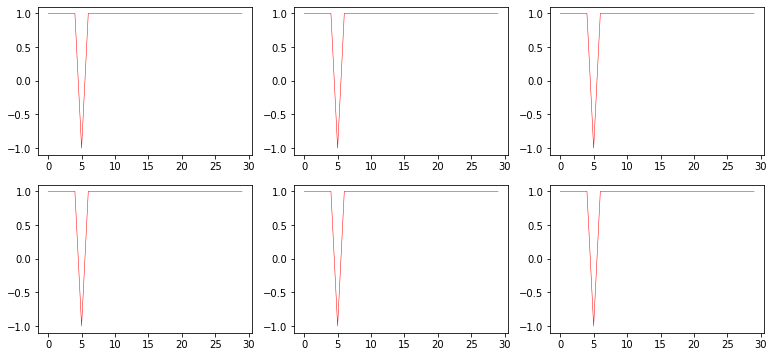

** step - 72 : gen loss= 22.45, disc loss= 0.00
** step - 73 : gen loss= 22.46, disc loss= 0.00
** step - 74 : gen loss= 22.48, disc loss= 0.00
Viewing samples at 75:
(28, 30, 1)


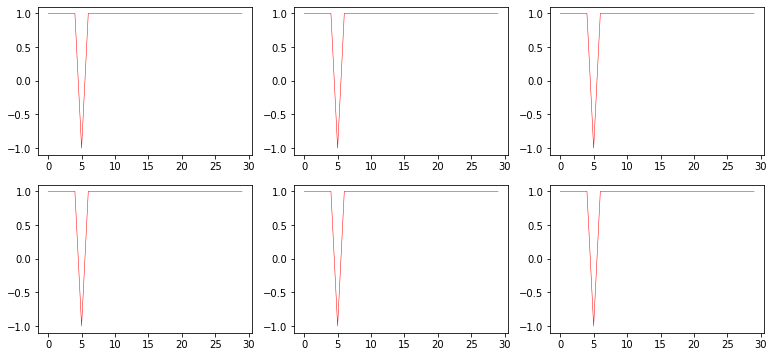

Saved checkpoint for step 77: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-16
** step - 75 : gen loss= 22.50, disc loss= 0.00
** step - 76 : gen loss= 22.51, disc loss= 0.00
** step - 77 : gen loss= 22.53, disc loss= 0.00
Viewing samples at 78:
(28, 30, 1)


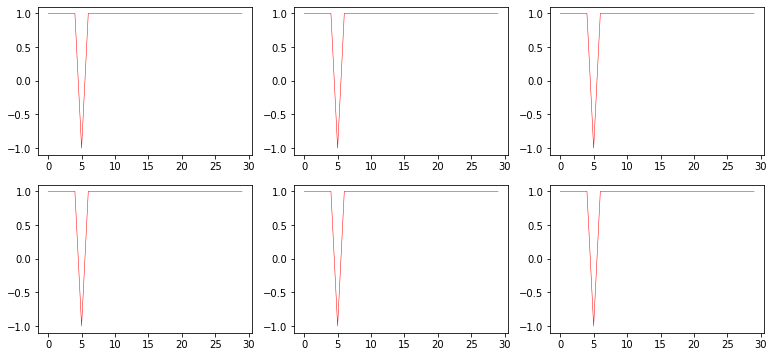

** step - 78 : gen loss= 22.54, disc loss= 0.00
** step - 79 : gen loss= 22.56, disc loss= 0.00
Saved checkpoint for step 82: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-17
** step - 80 : gen loss= 22.57, disc loss= 0.00
Viewing samples at 81:
(28, 30, 1)


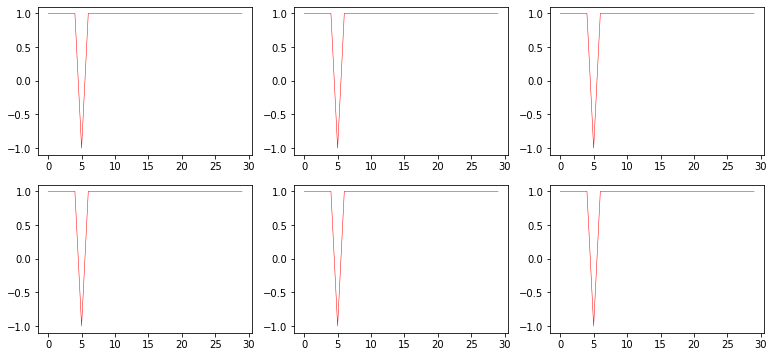

** step - 81 : gen loss= 22.59, disc loss= 0.00
** step - 82 : gen loss= 22.60, disc loss= 0.00
** step - 83 : gen loss= 22.62, disc loss= 0.00
Viewing samples at 84:
(28, 30, 1)


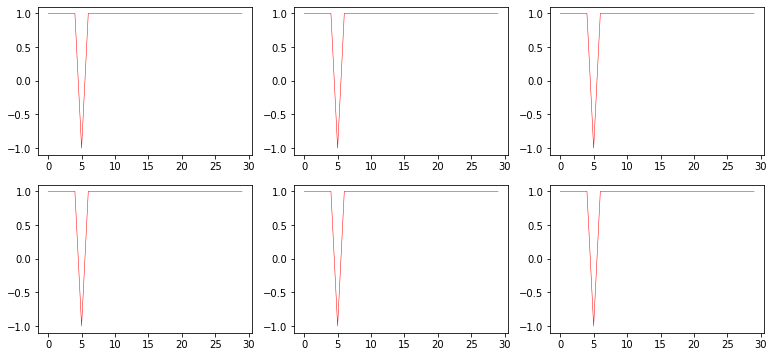

** step - 84 : gen loss= 22.63, disc loss= 0.00
Saved checkpoint for step 87: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-18
** step - 85 : gen loss= 22.65, disc loss= 0.00
** step - 86 : gen loss= 22.66, disc loss= 0.00
Viewing samples at 87:
(28, 30, 1)


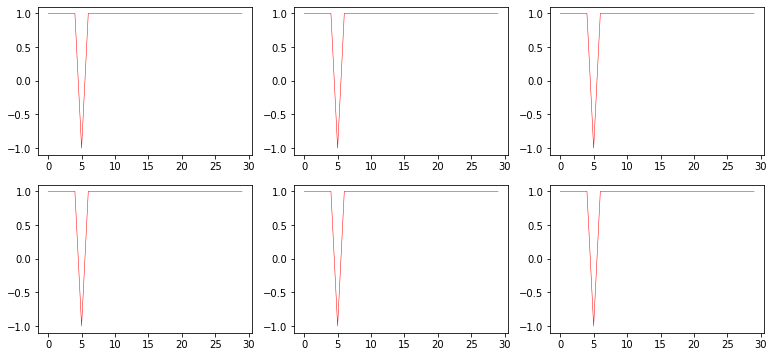

** step - 87 : gen loss= 22.67, disc loss= 0.00
** step - 88 : gen loss= 22.69, disc loss= 0.00
** step - 89 : gen loss= 22.70, disc loss= 0.00
Viewing samples at 90:
(28, 30, 1)


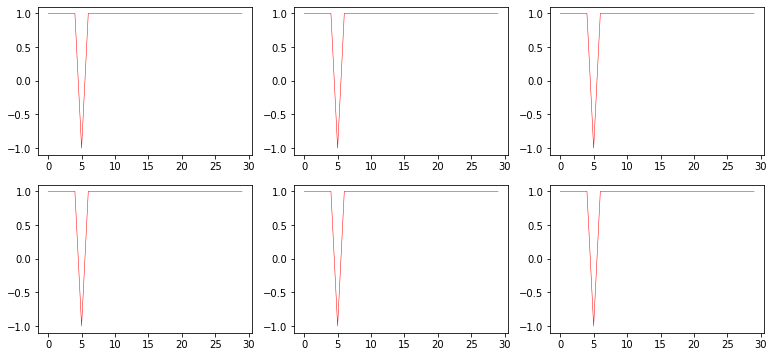

Saved checkpoint for step 92: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-19
** step - 90 : gen loss= 22.72, disc loss= 0.00
** step - 91 : gen loss= 22.73, disc loss= 0.00
** step - 92 : gen loss= 22.74, disc loss= 0.00
Viewing samples at 93:
(28, 30, 1)


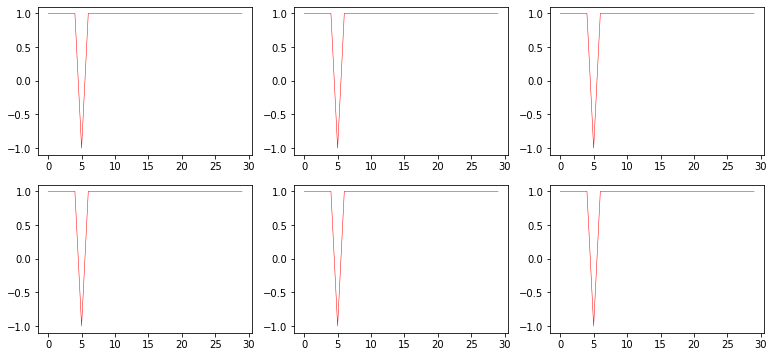

** step - 93 : gen loss= 22.75, disc loss= 0.00
** step - 94 : gen loss= 22.77, disc loss= 0.00
Saved checkpoint for step 97: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-20
** step - 95 : gen loss= 22.78, disc loss= 0.00
Viewing samples at 96:
(28, 30, 1)


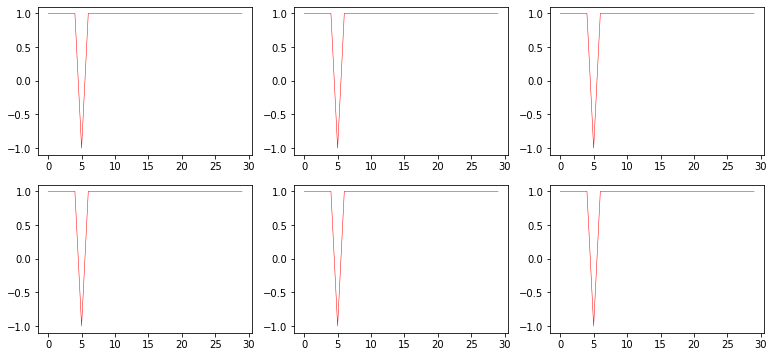

** step - 96 : gen loss= 22.79, disc loss= 0.00
** step - 97 : gen loss= 22.81, disc loss= 0.00
** step - 98 : gen loss= 22.82, disc loss= 0.00
Viewing samples at 99:
(28, 30, 1)


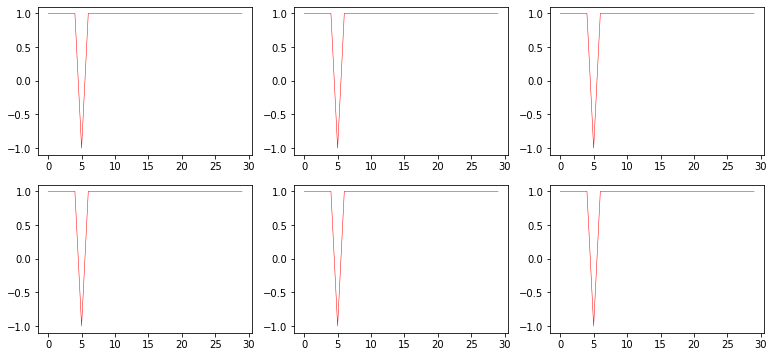

** step - 99 : gen loss= 22.83, disc loss= 0.00
Saved checkpoint for step 102: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-21
** step - 100 : gen loss= 22.84, disc loss= 0.00
** step - 101 : gen loss= 22.85, disc loss= 0.00
Viewing samples at 102:
(28, 30, 1)


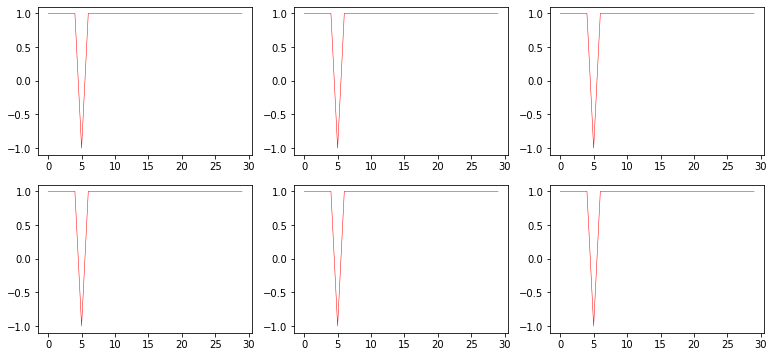

** step - 102 : gen loss= 22.87, disc loss= 0.00
** step - 103 : gen loss= 22.88, disc loss= 0.00
** step - 104 : gen loss= 22.89, disc loss= 0.00
Viewing samples at 105:
(28, 30, 1)


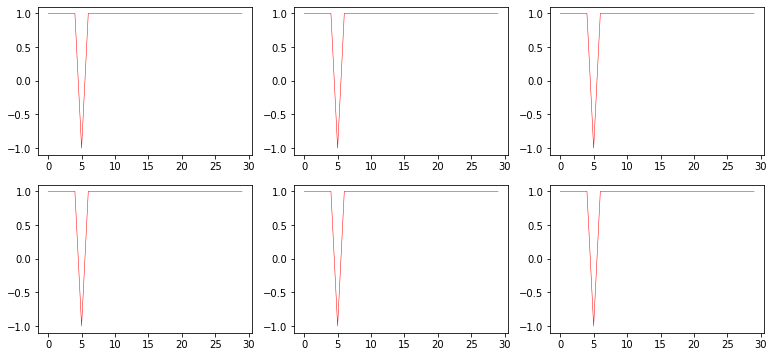

Saved checkpoint for step 107: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-22
** step - 105 : gen loss= 22.90, disc loss= 0.00
** step - 106 : gen loss= 22.91, disc loss= 0.00
** step - 107 : gen loss= 22.92, disc loss= 0.00
Viewing samples at 108:
(28, 30, 1)


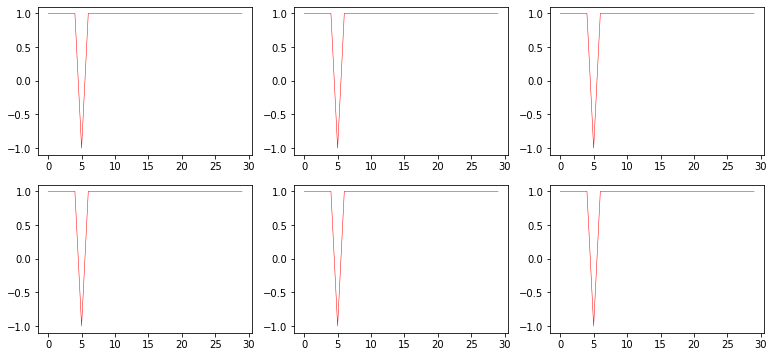

** step - 108 : gen loss= 22.93, disc loss= 0.00
** step - 109 : gen loss= 22.94, disc loss= 0.00
Saved checkpoint for step 112: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-23
** step - 110 : gen loss= 22.96, disc loss= 0.00
Viewing samples at 111:
(28, 30, 1)


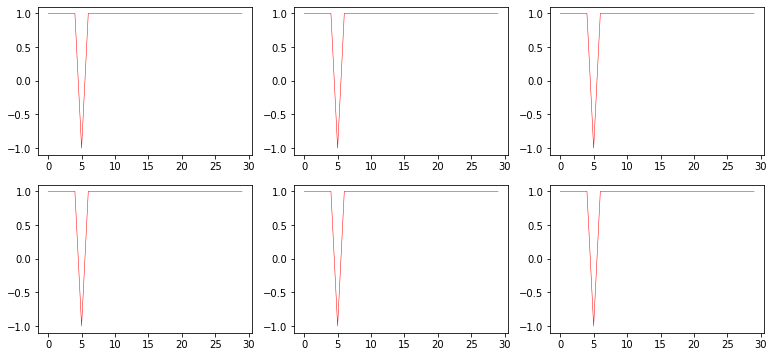

** step - 111 : gen loss= 22.97, disc loss= 0.00
** step - 112 : gen loss= 22.98, disc loss= 0.00
** step - 113 : gen loss= 22.99, disc loss= 0.00
Viewing samples at 114:
(28, 30, 1)


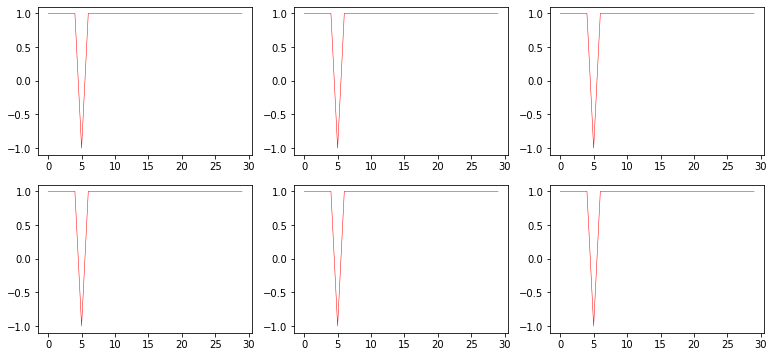

** step - 114 : gen loss= 23.00, disc loss= 0.00
Saved checkpoint for step 117: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-24
** step - 115 : gen loss= 23.01, disc loss= 0.00
** step - 116 : gen loss= 23.02, disc loss= 0.00
Viewing samples at 117:
(28, 30, 1)


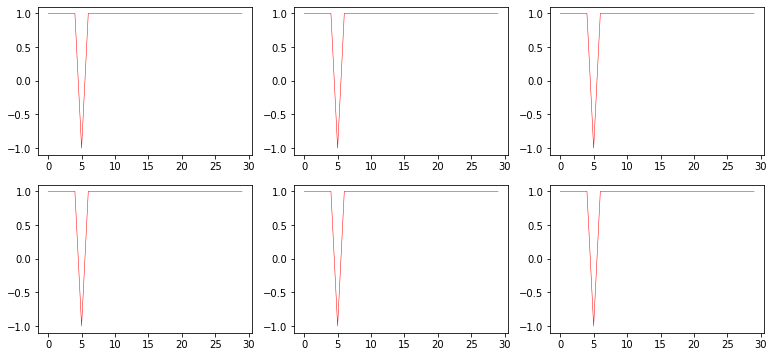

** step - 117 : gen loss= 23.03, disc loss= 0.00
** step - 118 : gen loss= 23.04, disc loss= 0.00
** step - 119 : gen loss= 23.05, disc loss= 0.00
Viewing samples at 120:
(28, 30, 1)


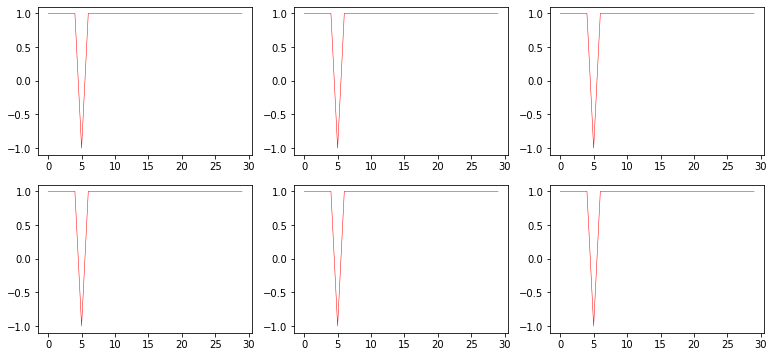

Saved checkpoint for step 122: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-25
** step - 120 : gen loss= 23.06, disc loss= 0.00
** step - 121 : gen loss= 23.07, disc loss= 0.00
** step - 122 : gen loss= 23.08, disc loss= 0.00
Viewing samples at 123:
(28, 30, 1)


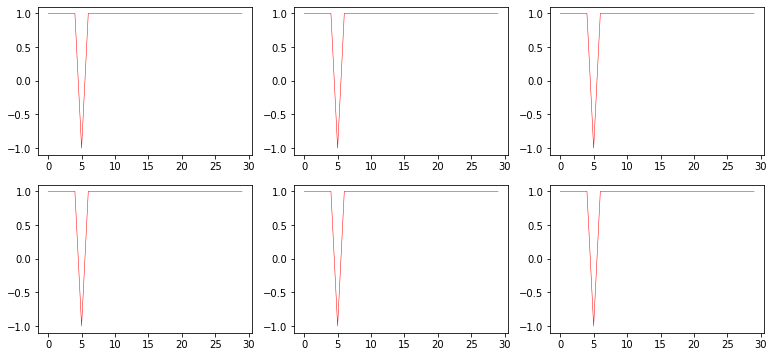

** step - 123 : gen loss= 23.09, disc loss= 0.00
** step - 124 : gen loss= 23.10, disc loss= 0.00
Saved checkpoint for step 127: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-26
** step - 125 : gen loss= 23.11, disc loss= 0.00
Viewing samples at 126:
(28, 30, 1)


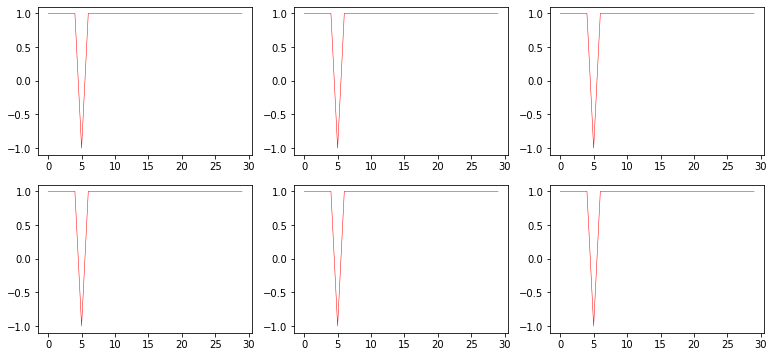

** step - 126 : gen loss= 23.12, disc loss= 0.00
** step - 127 : gen loss= 23.13, disc loss= 0.00
** step - 128 : gen loss= 23.14, disc loss= 0.00
Viewing samples at 129:
(28, 30, 1)


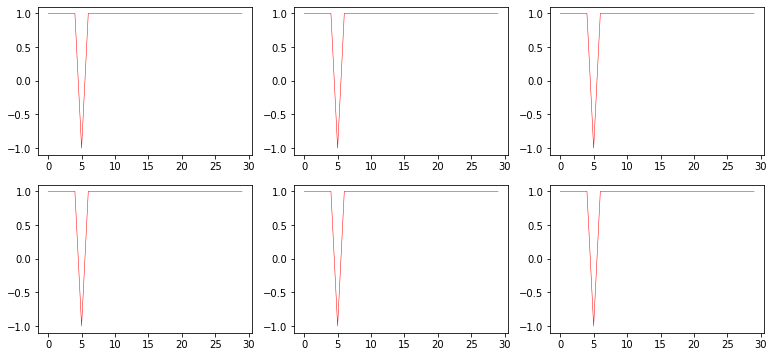

** step - 129 : gen loss= 23.14, disc loss= 0.00
Saved checkpoint for step 132: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-27
** step - 130 : gen loss= 23.15, disc loss= 0.00
** step - 131 : gen loss= 23.16, disc loss= 0.00
Viewing samples at 132:
(28, 30, 1)


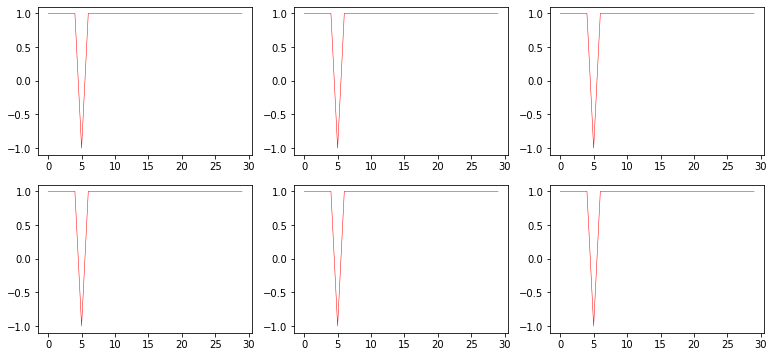

** step - 132 : gen loss= 23.17, disc loss= 0.00
** step - 133 : gen loss= 23.18, disc loss= 0.00
** step - 134 : gen loss= 23.19, disc loss= 0.00
Viewing samples at 135:
(28, 30, 1)


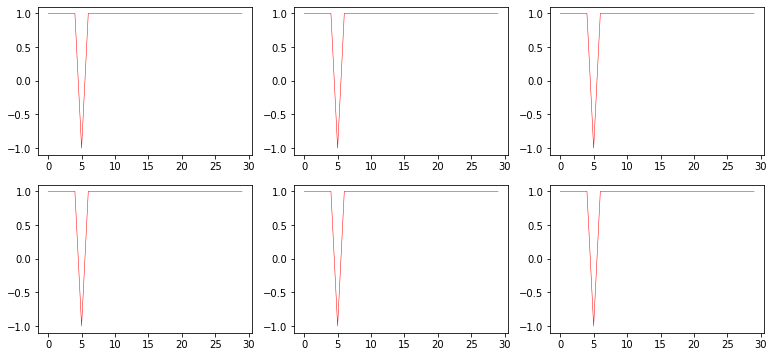

Saved checkpoint for step 137: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-28
** step - 135 : gen loss= 23.20, disc loss= 0.00
** step - 136 : gen loss= 23.21, disc loss= 0.00
** step - 137 : gen loss= 23.22, disc loss= 0.00
Viewing samples at 138:
(28, 30, 1)


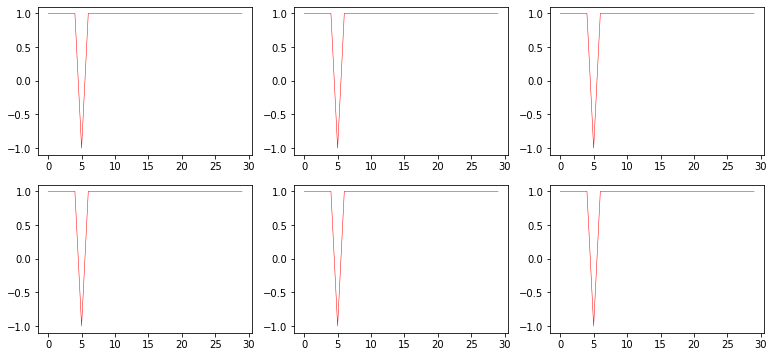

** step - 138 : gen loss= 23.22, disc loss= 0.00
** step - 139 : gen loss= 23.23, disc loss= 0.00
Saved checkpoint for step 142: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-29
** step - 140 : gen loss= 23.24, disc loss= 0.00
Viewing samples at 141:
(28, 30, 1)


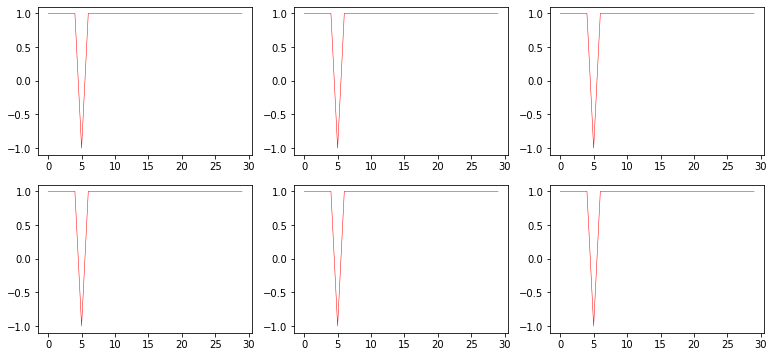

** step - 141 : gen loss= 23.25, disc loss= 0.00
** step - 142 : gen loss= 23.26, disc loss= 0.00
** step - 143 : gen loss= 23.27, disc loss= 0.00
Viewing samples at 144:
(28, 30, 1)


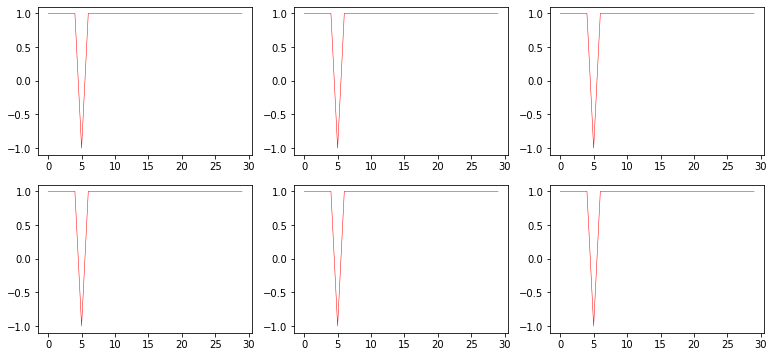

** step - 144 : gen loss= 23.27, disc loss= 0.00
Saved checkpoint for step 147: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-30
** step - 145 : gen loss= 23.28, disc loss= 0.00
** step - 146 : gen loss= 23.29, disc loss= 0.00
Viewing samples at 147:
(28, 30, 1)


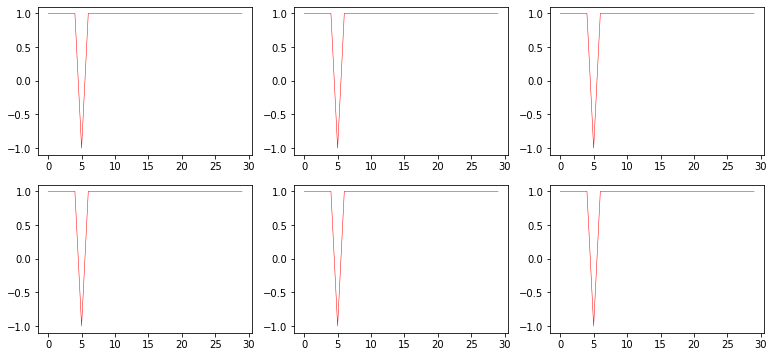

** step - 147 : gen loss= 23.30, disc loss= 0.00
** step - 148 : gen loss= 23.31, disc loss= 0.00
** step - 149 : gen loss= 23.31, disc loss= 0.00
Viewing samples at 150:
(28, 30, 1)


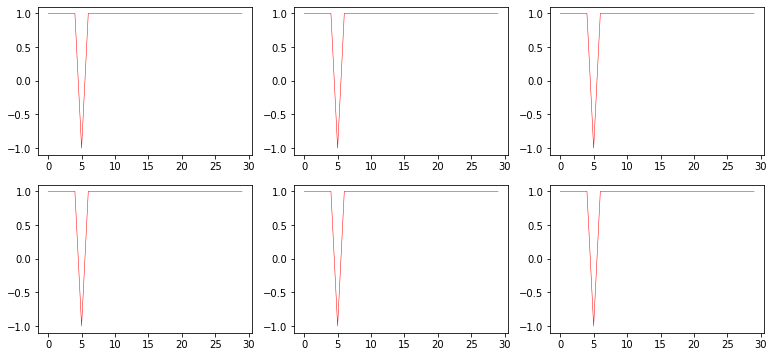

Saved checkpoint for step 152: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-31
** step - 150 : gen loss= 23.32, disc loss= 0.00
** step - 151 : gen loss= 23.33, disc loss= 0.00
** step - 152 : gen loss= 23.34, disc loss= 0.00
Viewing samples at 153:
(28, 30, 1)


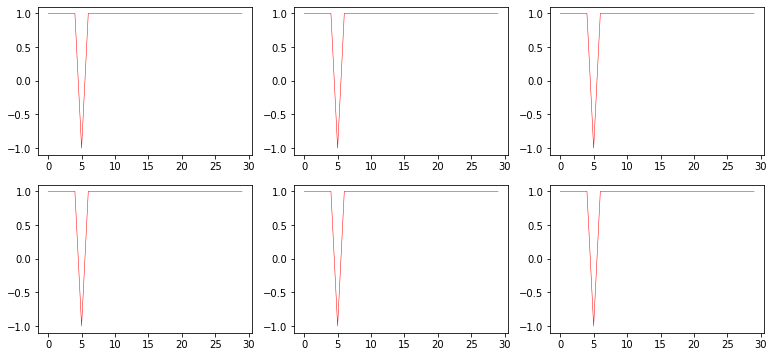

** step - 153 : gen loss= 23.34, disc loss= 0.00
** step - 154 : gen loss= 23.35, disc loss= 0.00
Saved checkpoint for step 157: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-32
** step - 155 : gen loss= 23.36, disc loss= 0.00
Viewing samples at 156:
(28, 30, 1)


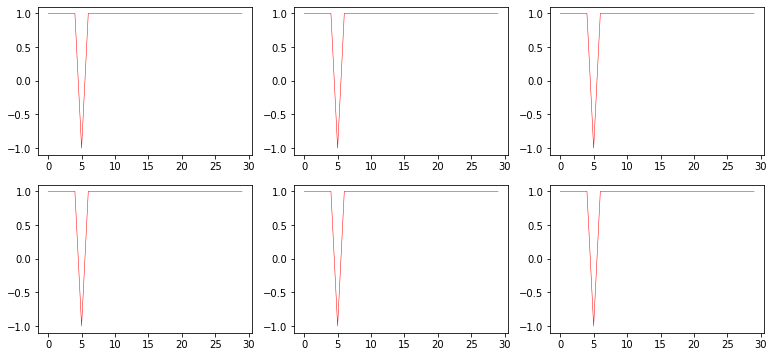

** step - 156 : gen loss= 23.37, disc loss= 0.00
** step - 157 : gen loss= 23.37, disc loss= 0.00
** step - 158 : gen loss= 23.38, disc loss= 0.00
Viewing samples at 159:
(28, 30, 1)


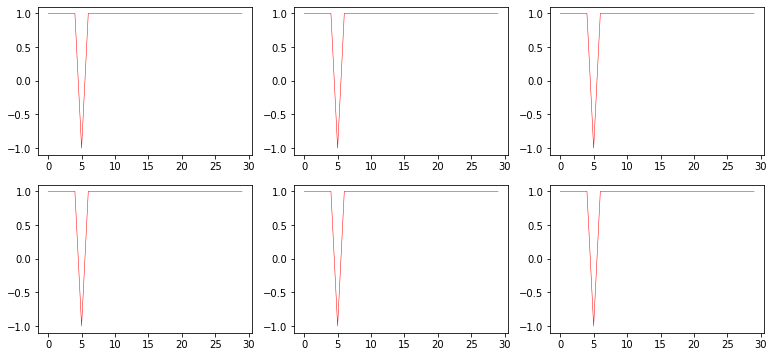

** step - 159 : gen loss= 23.39, disc loss= 0.00
Saved checkpoint for step 162: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-33
** step - 160 : gen loss= 23.40, disc loss= 0.00
** step - 161 : gen loss= 23.40, disc loss= 0.00
Viewing samples at 162:
(28, 30, 1)


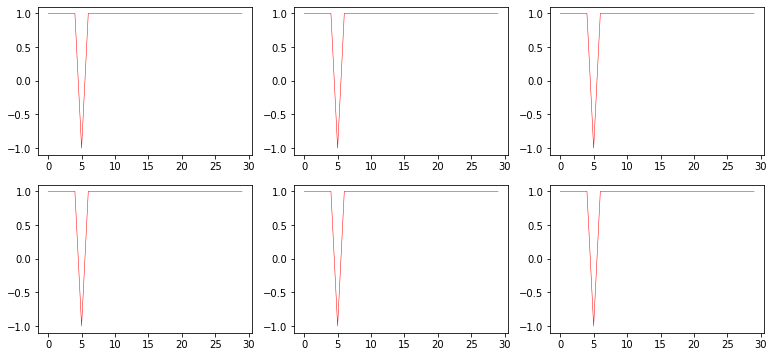

** step - 162 : gen loss= 23.41, disc loss= 0.00
** step - 163 : gen loss= 23.42, disc loss= 0.00
** step - 164 : gen loss= 23.42, disc loss= 0.00
Viewing samples at 165:
(28, 30, 1)


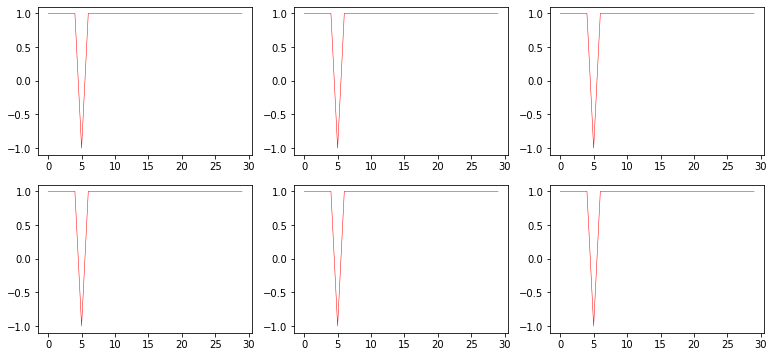

Saved checkpoint for step 167: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-34
** step - 165 : gen loss= 23.43, disc loss= 0.00
** step - 166 : gen loss= 23.44, disc loss= 0.00
** step - 167 : gen loss= 23.44, disc loss= 0.00
Viewing samples at 168:
(28, 30, 1)


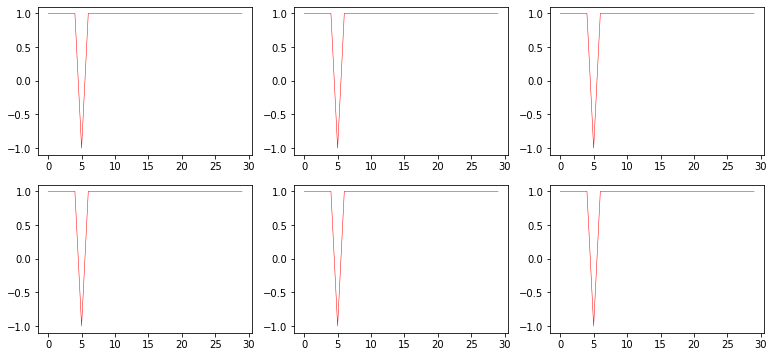

** step - 168 : gen loss= 23.45, disc loss= 0.00
** step - 169 : gen loss= 23.46, disc loss= 0.00
Saved checkpoint for step 172: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-35
** step - 170 : gen loss= 23.46, disc loss= 0.00
Viewing samples at 171:
(28, 30, 1)


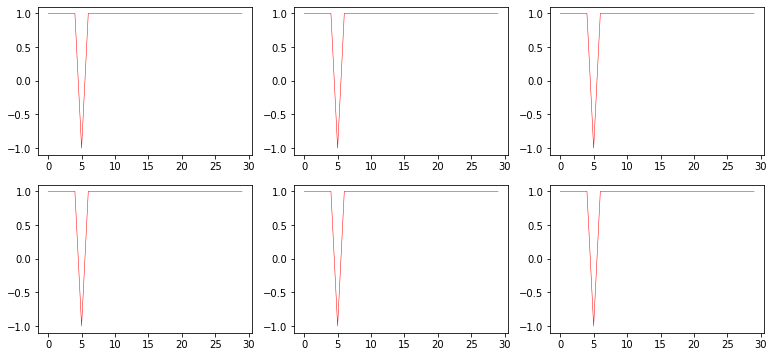

** step - 171 : gen loss= 23.47, disc loss= 0.00
** step - 172 : gen loss= 23.48, disc loss= 0.00
** step - 173 : gen loss= 23.48, disc loss= 0.00
Viewing samples at 174:
(28, 30, 1)


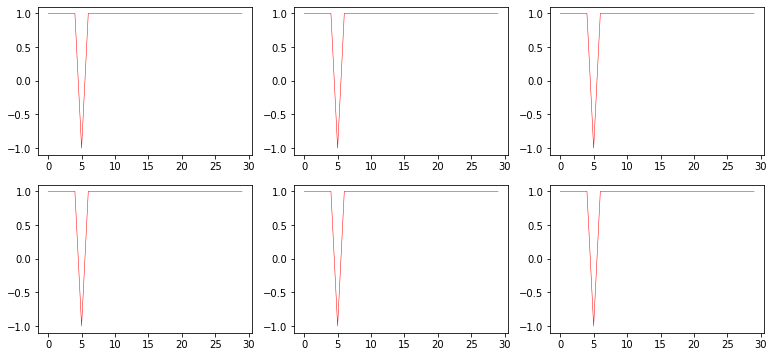

** step - 174 : gen loss= 23.49, disc loss= 0.00
Saved checkpoint for step 177: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-36
** step - 175 : gen loss= 23.50, disc loss= 0.00
** step - 176 : gen loss= 23.50, disc loss= 0.00
Viewing samples at 177:
(28, 30, 1)


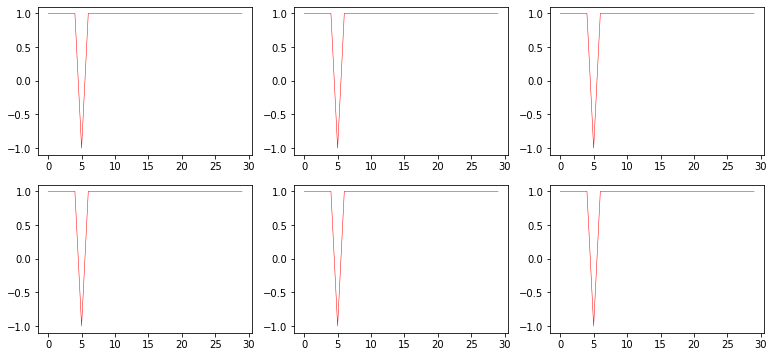

** step - 177 : gen loss= 23.51, disc loss= 0.00
** step - 178 : gen loss= 23.52, disc loss= 0.00
** step - 179 : gen loss= 23.52, disc loss= 0.00
Viewing samples at 180:
(28, 30, 1)


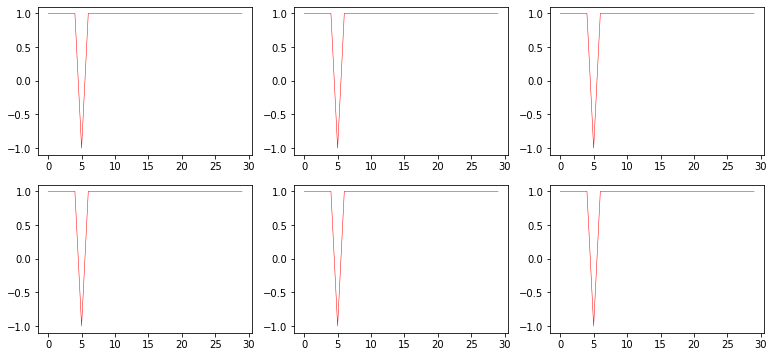

Saved checkpoint for step 182: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-37
** step - 180 : gen loss= 23.53, disc loss= 0.00
** step - 181 : gen loss= 23.54, disc loss= 0.00
** step - 182 : gen loss= 23.54, disc loss= 0.00
Viewing samples at 183:
(28, 30, 1)


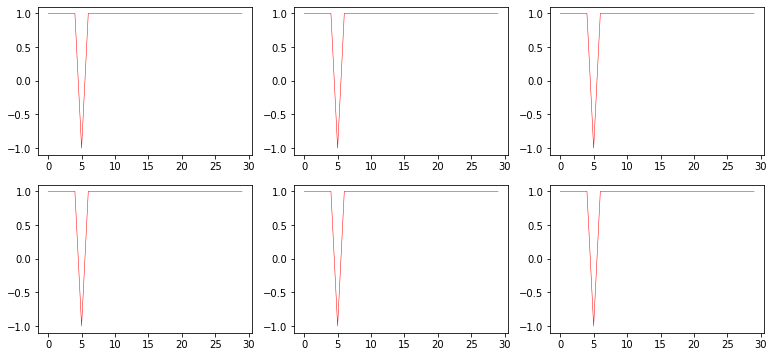

** step - 183 : gen loss= 23.55, disc loss= 0.00
** step - 184 : gen loss= 23.56, disc loss= 0.00
Saved checkpoint for step 187: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-38
** step - 185 : gen loss= 23.56, disc loss= 0.00
Viewing samples at 186:
(28, 30, 1)


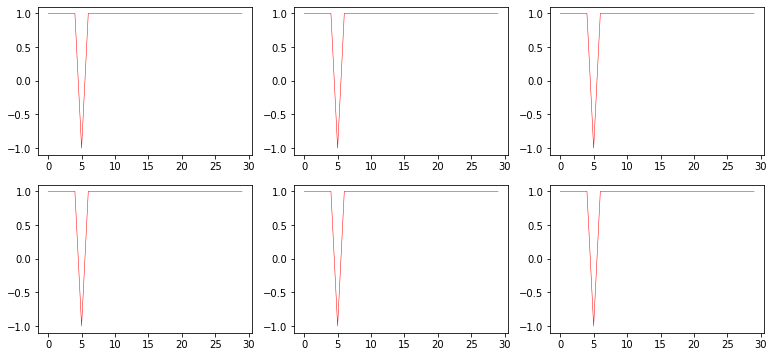

** step - 186 : gen loss= 23.57, disc loss= 0.00
** step - 187 : gen loss= 23.57, disc loss= 0.00
** step - 188 : gen loss= 23.58, disc loss= 0.00
Viewing samples at 189:
(28, 30, 1)


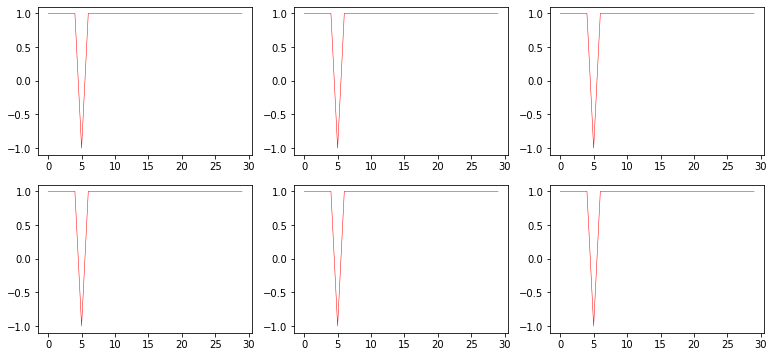

** step - 189 : gen loss= 23.59, disc loss= 0.00
Saved checkpoint for step 192: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-39
** step - 190 : gen loss= 23.59, disc loss= 0.00
** step - 191 : gen loss= 23.60, disc loss= 0.00
Viewing samples at 192:
(28, 30, 1)


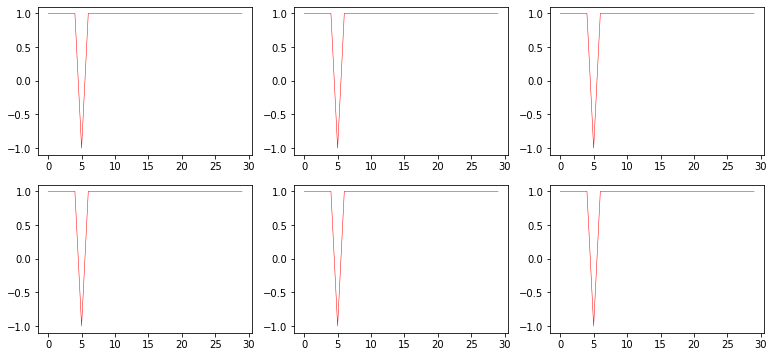

** step - 192 : gen loss= 23.61, disc loss= 0.00
** step - 193 : gen loss= 23.61, disc loss= 0.00
** step - 194 : gen loss= 23.62, disc loss= 0.00
Viewing samples at 195:
(28, 30, 1)


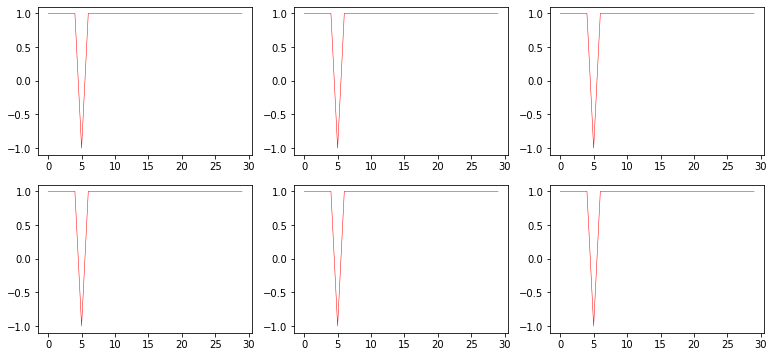

Saved checkpoint for step 197: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-40
** step - 195 : gen loss= 23.62, disc loss= 0.00
** step - 196 : gen loss= 23.63, disc loss= 0.00
** step - 197 : gen loss= 23.64, disc loss= 0.00
Viewing samples at 198:
(28, 30, 1)


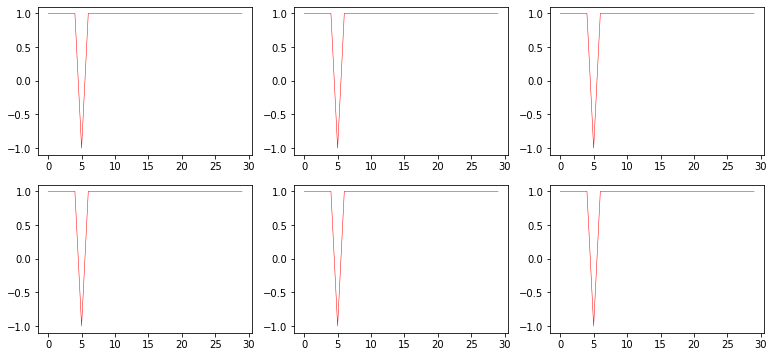

** step - 198 : gen loss= 23.64, disc loss= 0.00
** step - 199 : gen loss= 23.65, disc loss= 0.00
Saved checkpoint for step 202: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-41
** step - 200 : gen loss= 23.65, disc loss= 0.00
Viewing samples at 201:
(28, 30, 1)


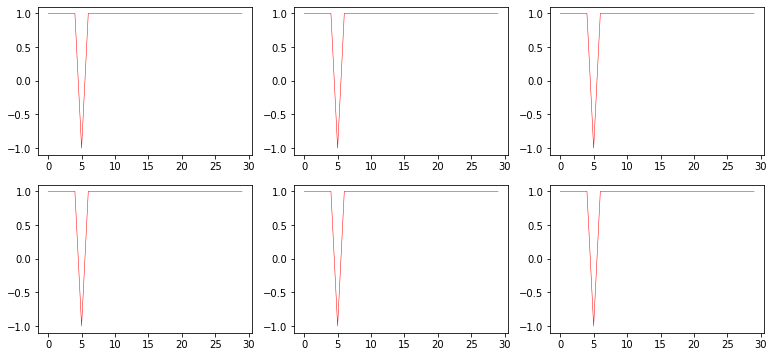

** step - 201 : gen loss= 23.66, disc loss= 0.00
** step - 202 : gen loss= 23.67, disc loss= 0.00
** step - 203 : gen loss= 23.67, disc loss= 0.00
Viewing samples at 204:
(28, 30, 1)


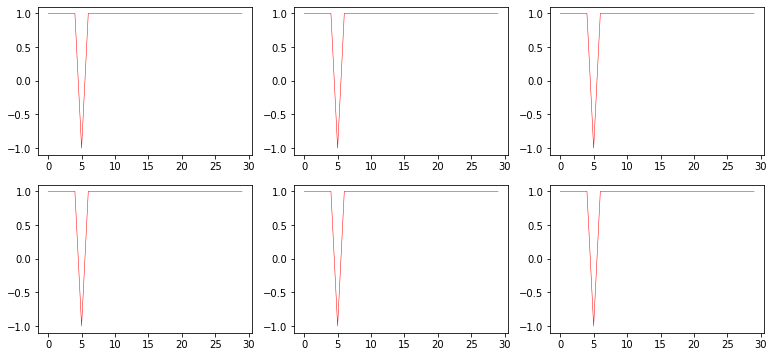

** step - 204 : gen loss= 23.68, disc loss= 0.00
Saved checkpoint for step 207: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-42
** step - 205 : gen loss= 23.69, disc loss= 0.00
** step - 206 : gen loss= 23.69, disc loss= 0.00
Viewing samples at 207:
(28, 30, 1)


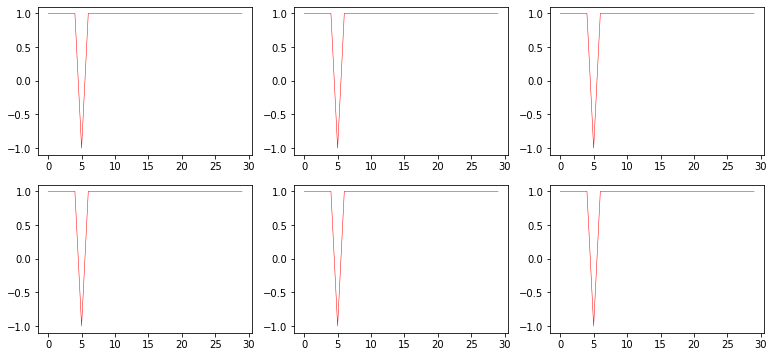

** step - 207 : gen loss= 23.70, disc loss= 0.00
** step - 208 : gen loss= 23.70, disc loss= 0.00
** step - 209 : gen loss= 23.71, disc loss= 0.00
Viewing samples at 210:
(28, 30, 1)


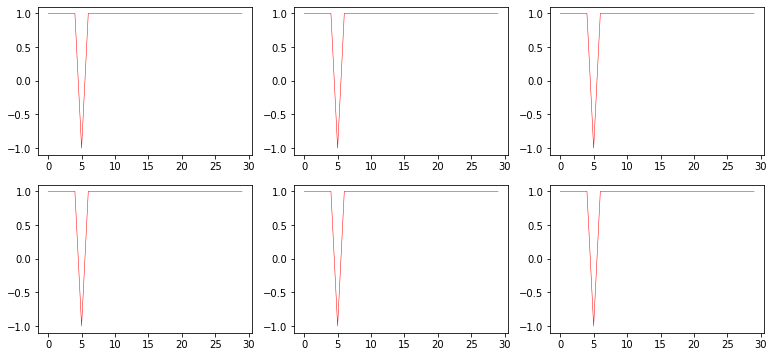

Saved checkpoint for step 212: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-43
** step - 210 : gen loss= 23.72, disc loss= 0.00
** step - 211 : gen loss= 23.72, disc loss= 0.00
** step - 212 : gen loss= 23.73, disc loss= 0.00
Viewing samples at 213:
(28, 30, 1)


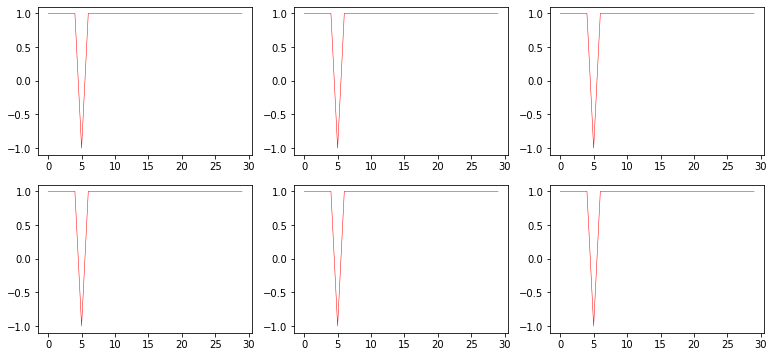

** step - 213 : gen loss= 23.74, disc loss= 0.00
** step - 214 : gen loss= 23.74, disc loss= 0.00
Saved checkpoint for step 217: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-44
** step - 215 : gen loss= 23.75, disc loss= 0.00
Viewing samples at 216:
(28, 30, 1)


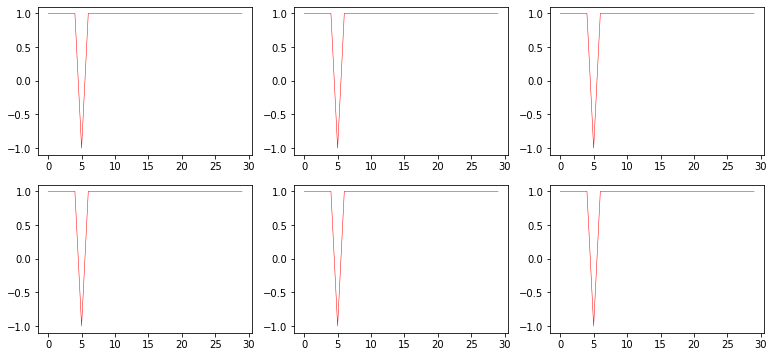

** step - 216 : gen loss= 23.76, disc loss= 0.00
** step - 217 : gen loss= 23.76, disc loss= 0.00
** step - 218 : gen loss= 23.77, disc loss= 0.00
Viewing samples at 219:
(28, 30, 1)


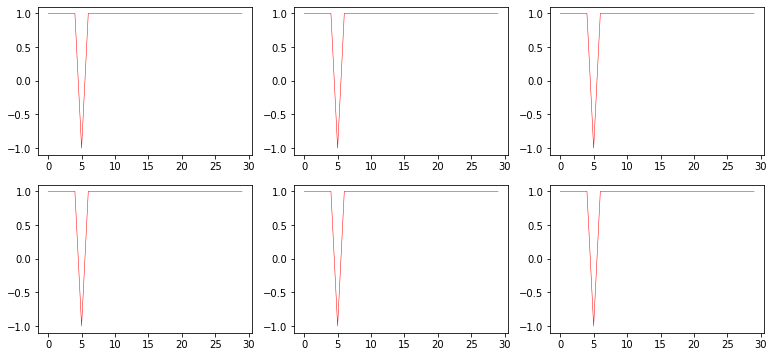

** step - 219 : gen loss= 23.78, disc loss= 0.00
Saved checkpoint for step 222: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-45
** step - 220 : gen loss= 23.79, disc loss= 0.00
** step - 221 : gen loss= 23.79, disc loss= 0.00
Viewing samples at 222:
(28, 30, 1)


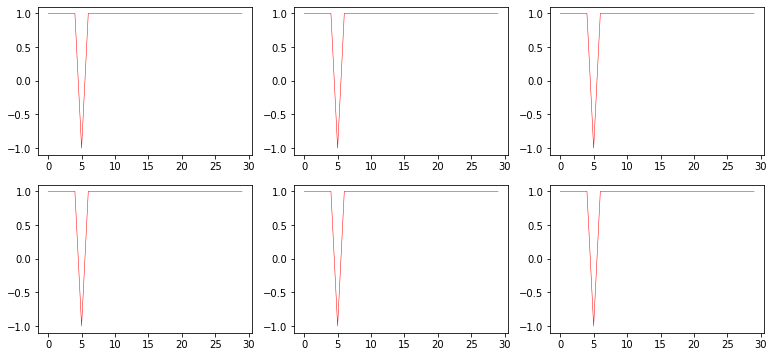

** step - 222 : gen loss= 23.80, disc loss= 0.00
** step - 223 : gen loss= 23.81, disc loss= 0.00
** step - 224 : gen loss= 23.82, disc loss= 0.00
Viewing samples at 225:
(28, 30, 1)


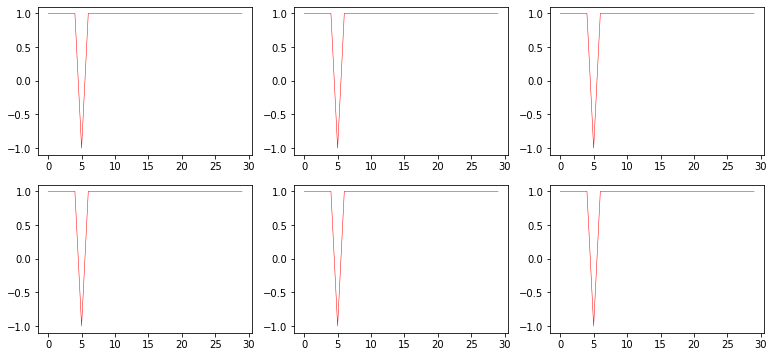

Saved checkpoint for step 227: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-46
** step - 225 : gen loss= 23.83, disc loss= 0.00
** step - 226 : gen loss= 23.84, disc loss= 0.00
** step - 227 : gen loss= 23.85, disc loss= 0.00
Viewing samples at 228:
(28, 30, 1)


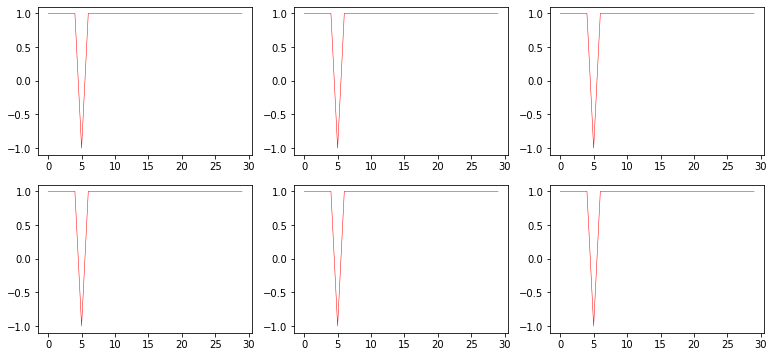

** step - 228 : gen loss= 23.86, disc loss= 0.00
** step - 229 : gen loss= 23.87, disc loss= 0.00
Saved checkpoint for step 232: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-47
** step - 230 : gen loss= 23.89, disc loss= 0.00
Viewing samples at 231:
(28, 30, 1)


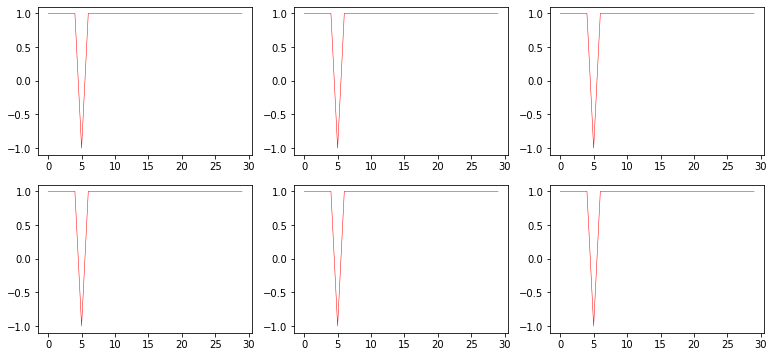

** step - 231 : gen loss= 23.90, disc loss= 0.00
** step - 232 : gen loss= 23.92, disc loss= 0.00
** step - 233 : gen loss= 23.93, disc loss= 0.00
Viewing samples at 234:
(28, 30, 1)


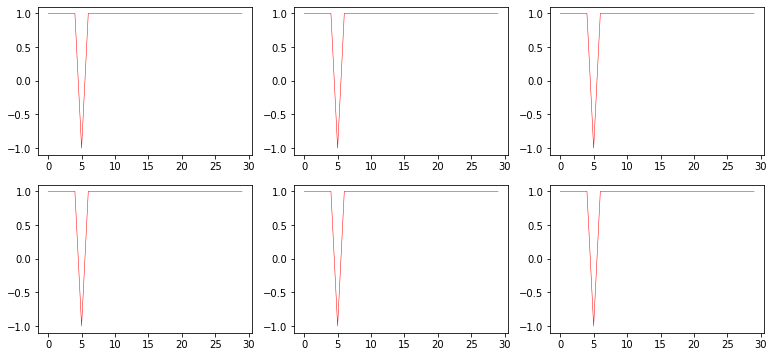

** step - 234 : gen loss= 23.95, disc loss= 0.00
Saved checkpoint for step 237: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-48
** step - 235 : gen loss= 23.97, disc loss= 0.00
** step - 236 : gen loss= 24.00, disc loss= 0.00
Viewing samples at 237:
(28, 30, 1)


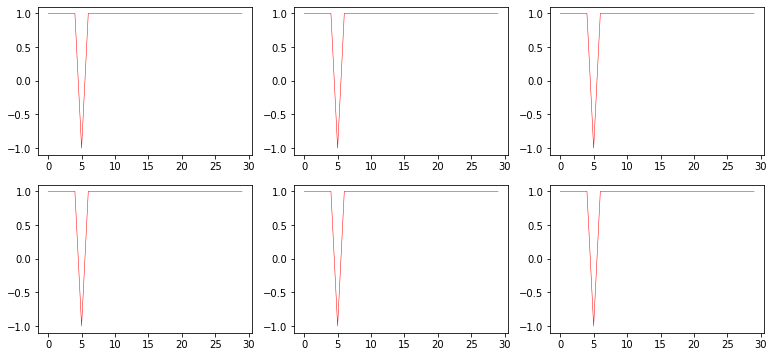

** step - 237 : gen loss= 24.02, disc loss= 0.00
** step - 238 : gen loss= 24.05, disc loss= 0.00
** step - 239 : gen loss= 24.08, disc loss= 0.00
Viewing samples at 240:
(28, 30, 1)


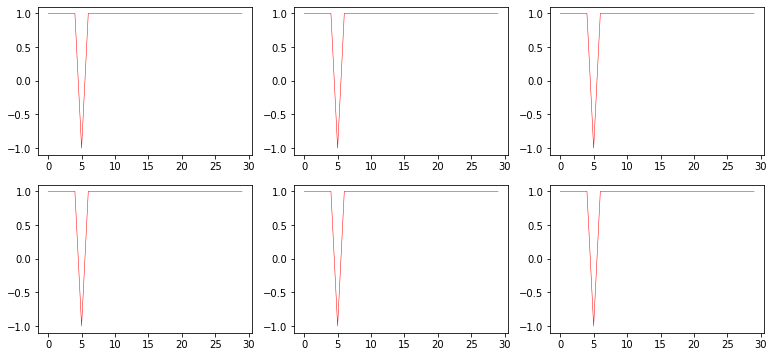

Saved checkpoint for step 242: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-49
** step - 240 : gen loss= 24.12, disc loss= 0.00
** step - 241 : gen loss= 24.16, disc loss= 0.00
** step - 242 : gen loss= 24.21, disc loss= 0.00
Viewing samples at 243:
(28, 30, 1)


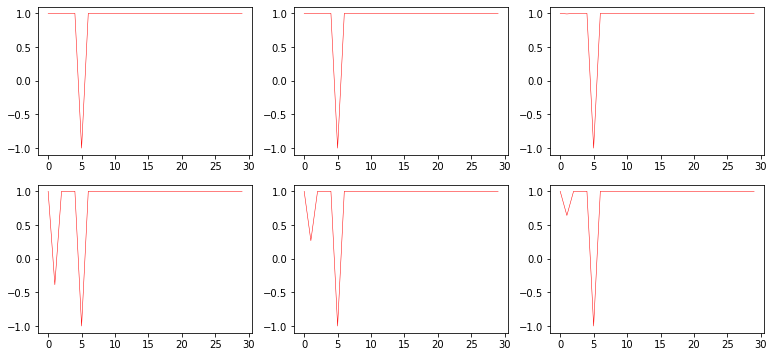

** step - 243 : gen loss= 24.22, disc loss= 0.00
** step - 244 : gen loss= 24.05, disc loss= 0.00
Saved checkpoint for step 247: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-50
** step - 245 : gen loss= 24.09, disc loss= 0.00
Viewing samples at 246:
(28, 30, 1)


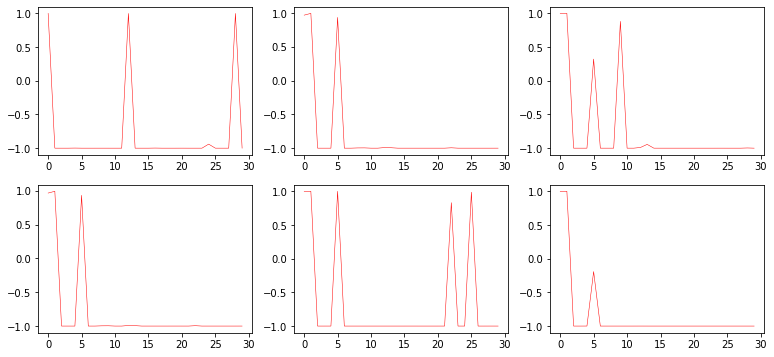

** step - 246 : gen loss= 19.77, disc loss= 0.00
** step - 247 : gen loss= 17.62, disc loss= 0.00
** step - 248 : gen loss= 20.65, disc loss= 0.00
Viewing samples at 249:
(28, 30, 1)


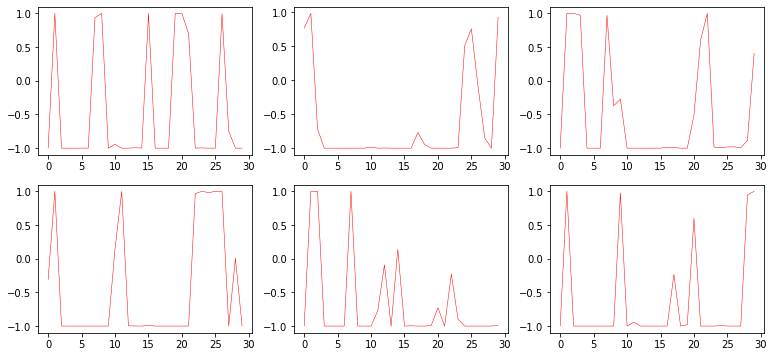

** step - 249 : gen loss= 21.13, disc loss= 0.00
Saved checkpoint for step 252: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-51
** step - 250 : gen loss= 21.32, disc loss= 0.00
** step - 251 : gen loss= 21.20, disc loss= 0.00
Viewing samples at 252:
(28, 30, 1)


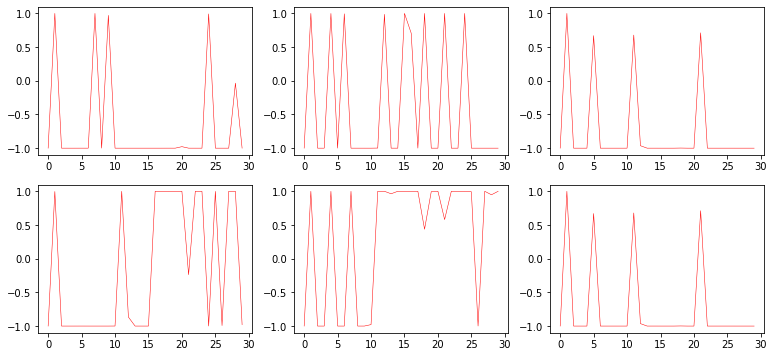

** step - 252 : gen loss= 21.84, disc loss= 0.00
** step - 253 : gen loss= 19.44, disc loss= 0.00
** step - 254 : gen loss= 21.13, disc loss= 0.00
Viewing samples at 255:
(28, 30, 1)


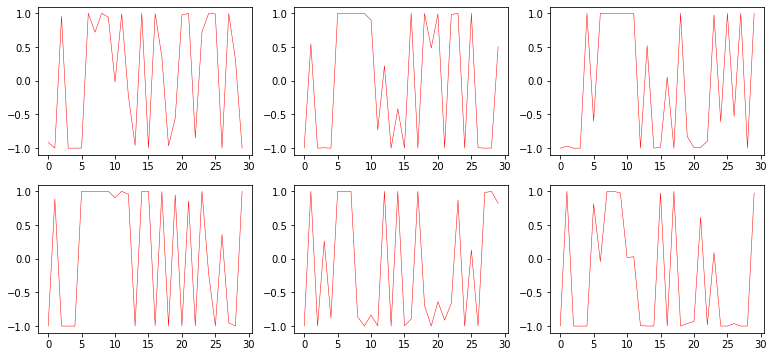

Saved checkpoint for step 257: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-52
** step - 255 : gen loss= 22.86, disc loss= 0.00
** step - 256 : gen loss= 20.97, disc loss= 0.00
** step - 257 : gen loss= 21.69, disc loss= 0.00
Viewing samples at 258:
(28, 30, 1)


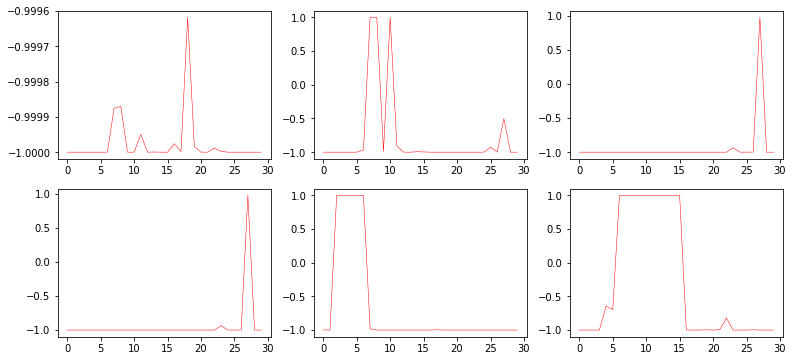

** step - 258 : gen loss= 20.15, disc loss= 0.00
** step - 259 : gen loss= 23.86, disc loss= 0.00
Saved checkpoint for step 262: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-53
** step - 260 : gen loss= 24.07, disc loss= 0.00
Viewing samples at 261:
(28, 30, 1)


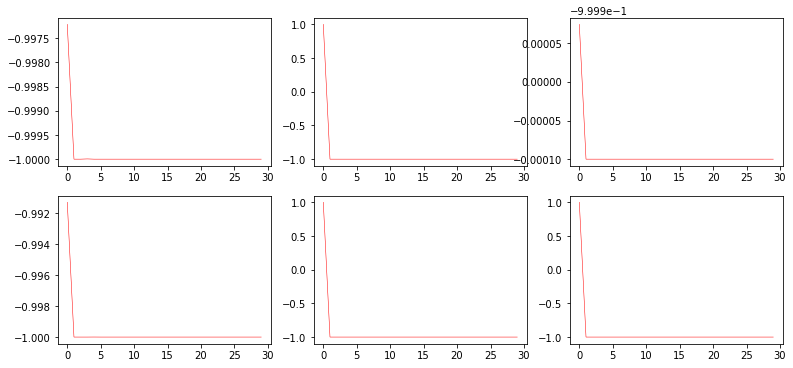

** step - 261 : gen loss= 24.14, disc loss= 0.00
** step - 262 : gen loss= 24.65, disc loss= 0.00
** step - 263 : gen loss= 23.73, disc loss= 0.00
Viewing samples at 264:
(28, 30, 1)


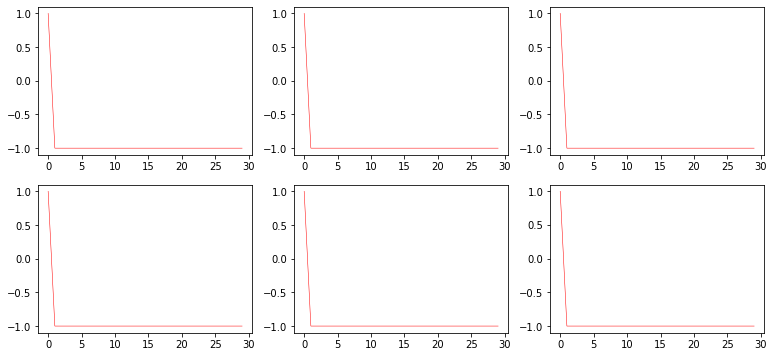

** step - 264 : gen loss= 23.94, disc loss= 0.00
Saved checkpoint for step 267: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-54
** step - 265 : gen loss= 24.03, disc loss= 0.00
** step - 266 : gen loss= 23.98, disc loss= 0.00
Viewing samples at 267:
(28, 30, 1)


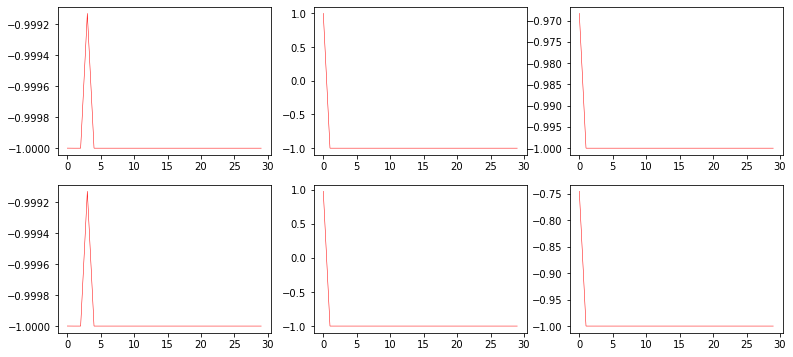

** step - 267 : gen loss= 23.93, disc loss= 0.00
** step - 268 : gen loss= 23.75, disc loss= 0.00
** step - 269 : gen loss= 24.10, disc loss= 0.00
Viewing samples at 270:
(28, 30, 1)


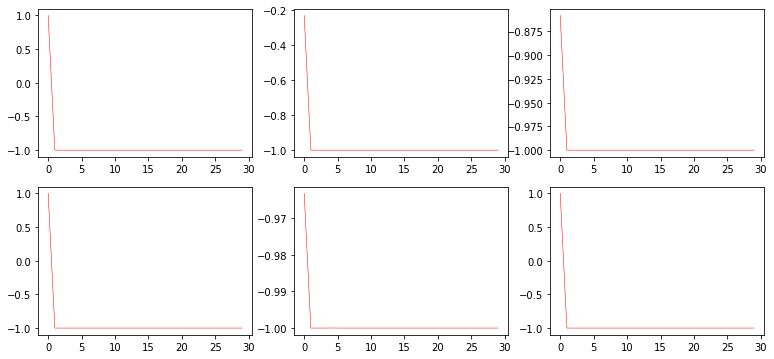

Saved checkpoint for step 272: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-55
** step - 270 : gen loss= 23.69, disc loss= 0.00
** step - 271 : gen loss= 23.76, disc loss= 0.00
** step - 272 : gen loss= 23.78, disc loss= 0.00
Viewing samples at 273:
(28, 30, 1)


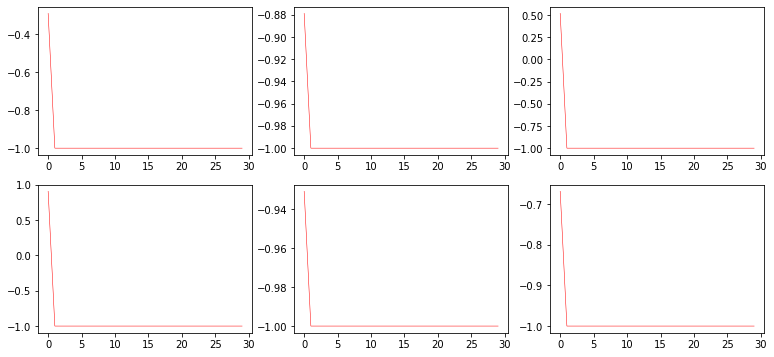

** step - 273 : gen loss= 23.90, disc loss= 0.00
** step - 274 : gen loss= 23.68, disc loss= 0.00
Saved checkpoint for step 277: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-56
** step - 275 : gen loss= 23.75, disc loss= 0.00
Viewing samples at 276:
(28, 30, 1)


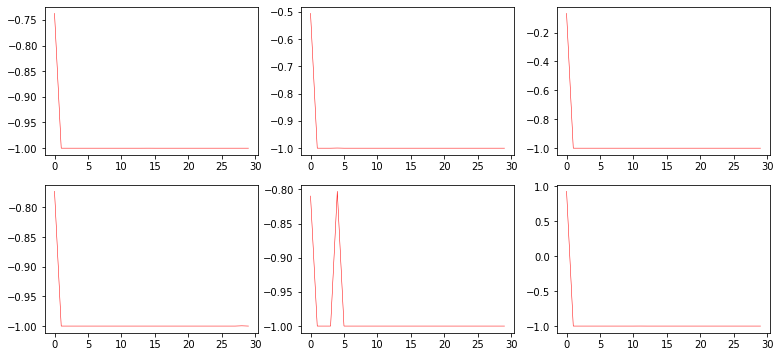

** step - 276 : gen loss= 23.72, disc loss= 0.00
** step - 277 : gen loss= 24.03, disc loss= 0.00
** step - 278 : gen loss= 24.04, disc loss= 0.00
Viewing samples at 279:
(28, 30, 1)


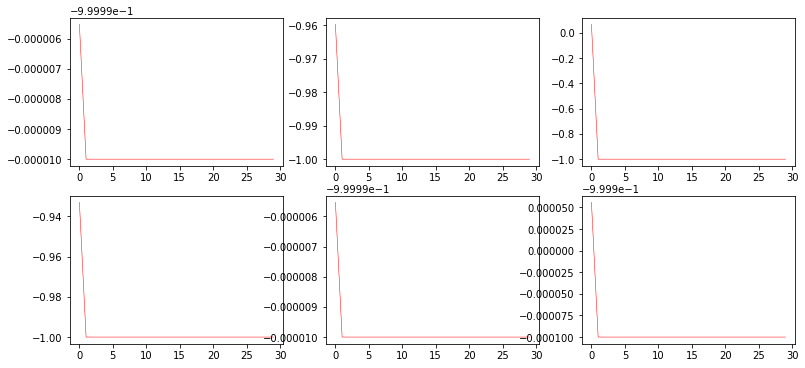

** step - 279 : gen loss= 24.18, disc loss= 0.00
Saved checkpoint for step 282: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-57
** step - 280 : gen loss= 24.16, disc loss= 0.00
** step - 281 : gen loss= 23.92, disc loss= 0.00
Viewing samples at 282:
(28, 30, 1)


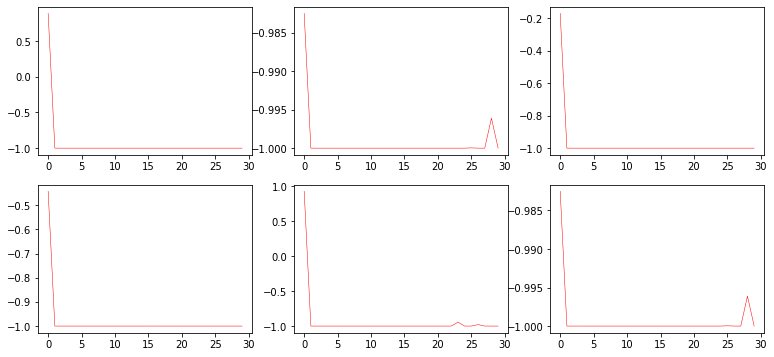

** step - 282 : gen loss= 24.20, disc loss= 0.00
** step - 283 : gen loss= 23.99, disc loss= 0.00
** step - 284 : gen loss= 24.50, disc loss= 0.00
Viewing samples at 285:
(28, 30, 1)


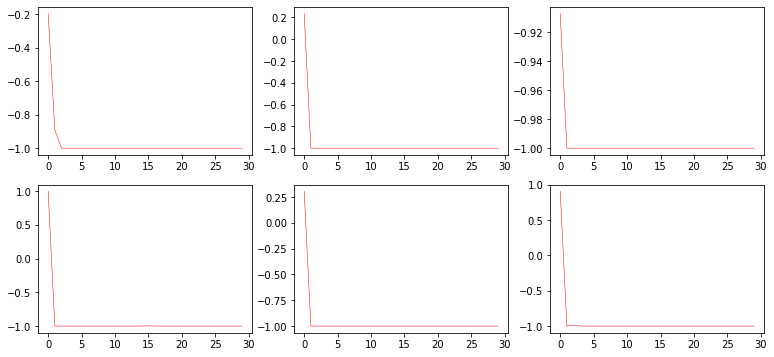

Saved checkpoint for step 287: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-58
** step - 285 : gen loss= 23.77, disc loss= 0.00
** step - 286 : gen loss= 24.57, disc loss= 0.00
** step - 287 : gen loss= 23.87, disc loss= 0.00
Viewing samples at 288:
(28, 30, 1)


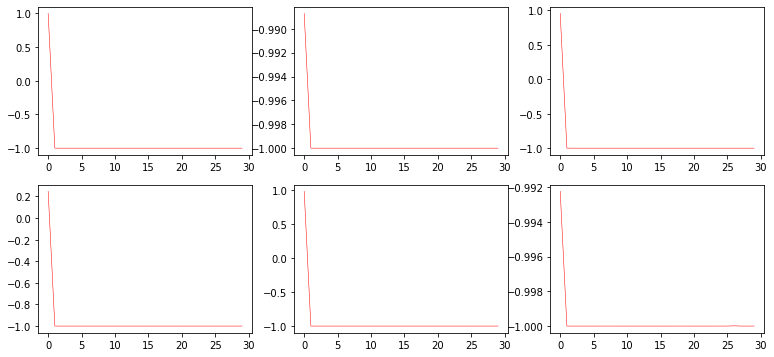

** step - 288 : gen loss= 23.56, disc loss= 0.00
** step - 289 : gen loss= 23.85, disc loss= 0.00
Saved checkpoint for step 292: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-59
** step - 290 : gen loss= 23.96, disc loss= 0.00
Viewing samples at 291:
(28, 30, 1)


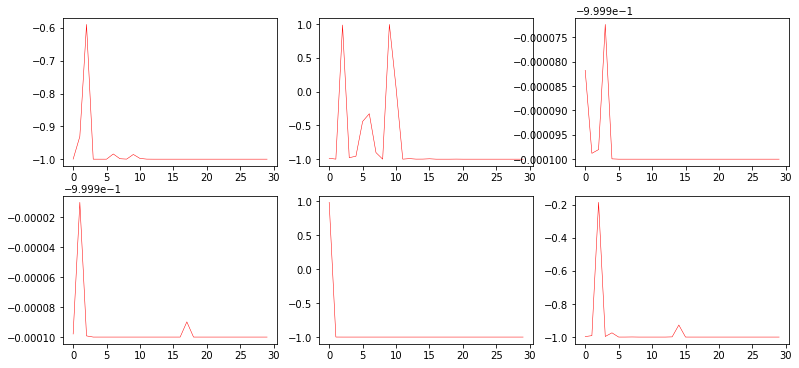

** step - 291 : gen loss= 23.81, disc loss= 0.00
** step - 292 : gen loss= 23.45, disc loss= 0.00
** step - 293 : gen loss= 23.36, disc loss= 0.00
Viewing samples at 294:
(28, 30, 1)


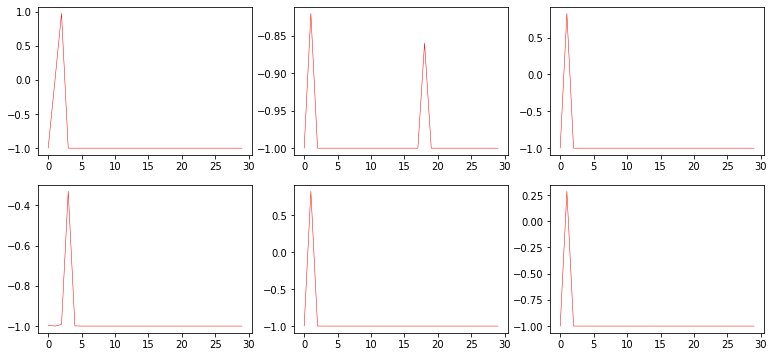

** step - 294 : gen loss= 23.19, disc loss= 0.00
Saved checkpoint for step 297: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-60
** step - 295 : gen loss= 23.48, disc loss= 0.00
** step - 296 : gen loss= 23.31, disc loss= 0.00
Viewing samples at 297:
(28, 30, 1)


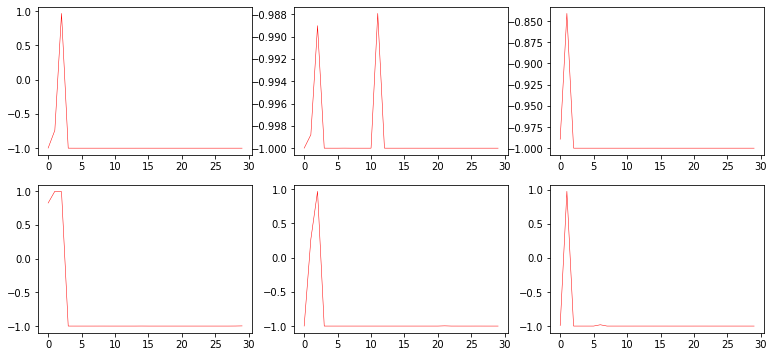

** step - 297 : gen loss= 23.59, disc loss= 0.00
** step - 298 : gen loss= 23.18, disc loss= 0.00
** step - 299 : gen loss= 23.39, disc loss= 0.00
Viewing samples at 300:
(28, 30, 1)


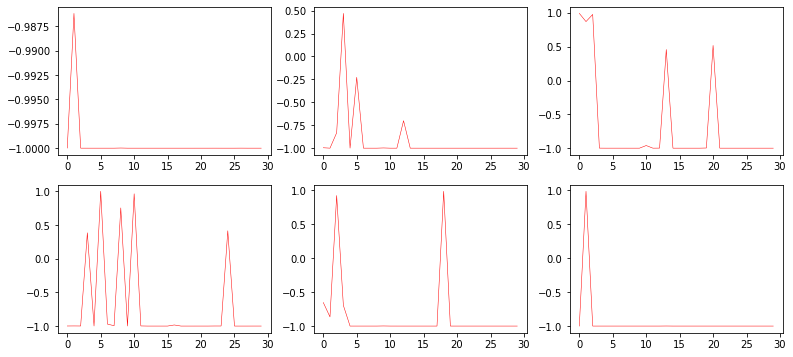

Saved checkpoint for step 302: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-61
** step - 300 : gen loss= 23.57, disc loss= 0.00
** step - 301 : gen loss= 23.47, disc loss= 0.00
** step - 302 : gen loss= 23.49, disc loss= 0.00
Viewing samples at 303:
(28, 30, 1)


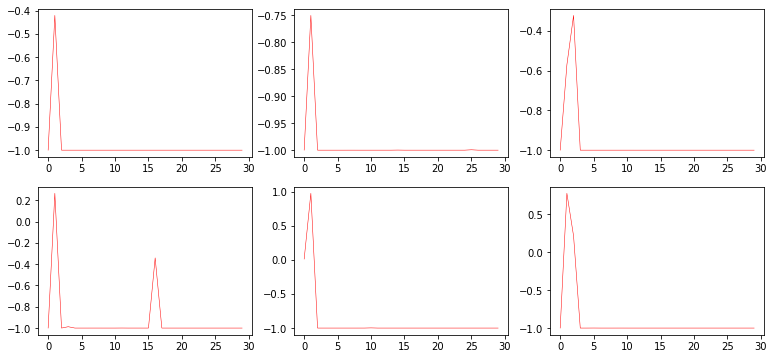

** step - 303 : gen loss= 23.50, disc loss= 0.00
** step - 304 : gen loss= 23.35, disc loss= 0.00
Saved checkpoint for step 307: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-62
** step - 305 : gen loss= 23.35, disc loss= 0.00
Viewing samples at 306:
(28, 30, 1)


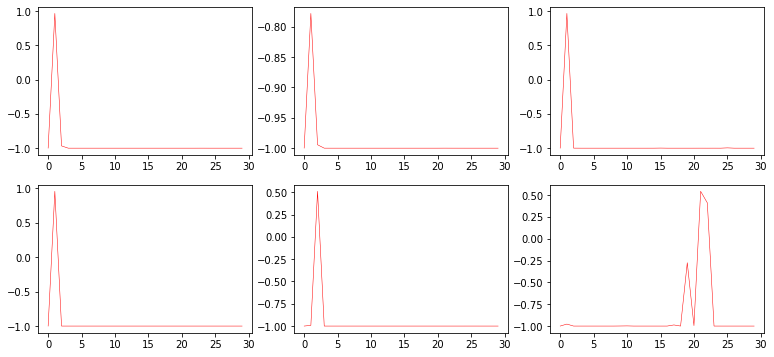

** step - 306 : gen loss= 23.32, disc loss= 0.00
** step - 307 : gen loss= 23.87, disc loss= 0.00
** step - 308 : gen loss= 23.28, disc loss= 0.00
Viewing samples at 309:
(28, 30, 1)


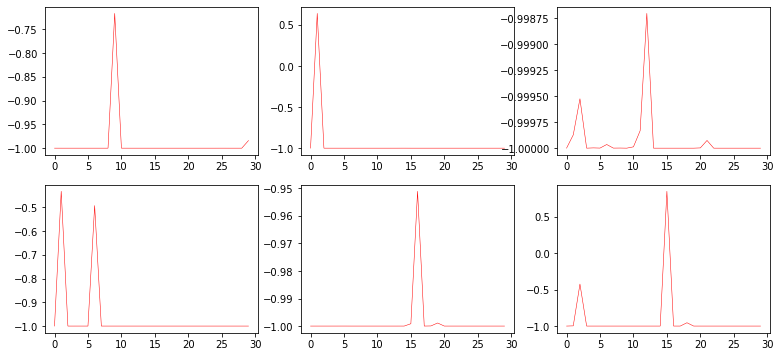

** step - 309 : gen loss= 23.65, disc loss= 0.00
Saved checkpoint for step 312: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-63
** step - 310 : gen loss= 23.95, disc loss= 0.00
** step - 311 : gen loss= 23.58, disc loss= 0.00
Viewing samples at 312:
(28, 30, 1)


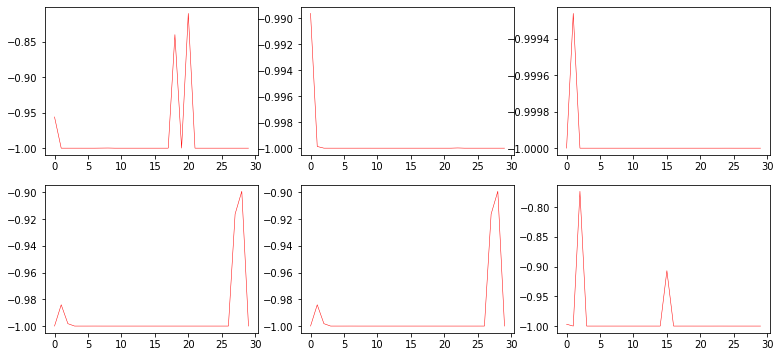

** step - 312 : gen loss= 23.46, disc loss= 0.00
** step - 313 : gen loss= 23.39, disc loss= 0.00
** step - 314 : gen loss= 23.85, disc loss= 0.00
Viewing samples at 315:
(28, 30, 1)


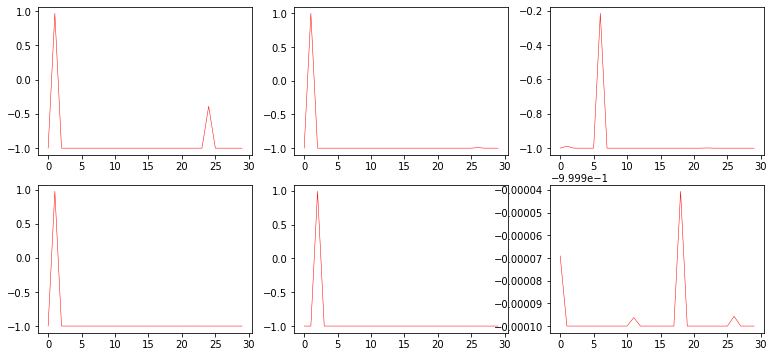

Saved checkpoint for step 317: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-64
** step - 315 : gen loss= 24.05, disc loss= 0.00
** step - 316 : gen loss= 23.44, disc loss= 0.00
** step - 317 : gen loss= 23.39, disc loss= 0.00
Viewing samples at 318:
(28, 30, 1)


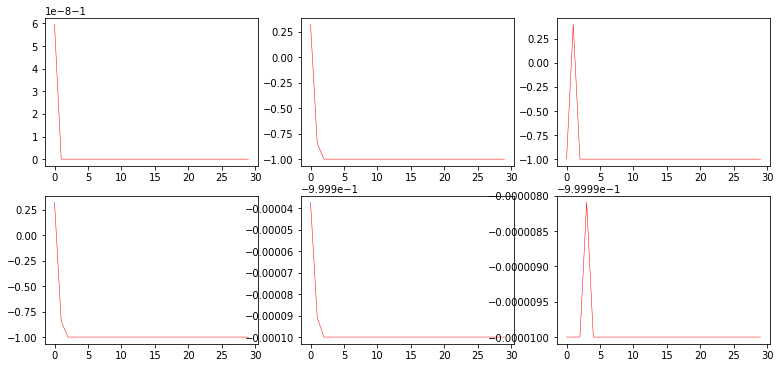

** step - 318 : gen loss= 23.38, disc loss= 0.00
** step - 319 : gen loss= 23.54, disc loss= 0.00
Saved checkpoint for step 322: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-65
** step - 320 : gen loss= 23.43, disc loss= 0.00
Viewing samples at 321:
(28, 30, 1)


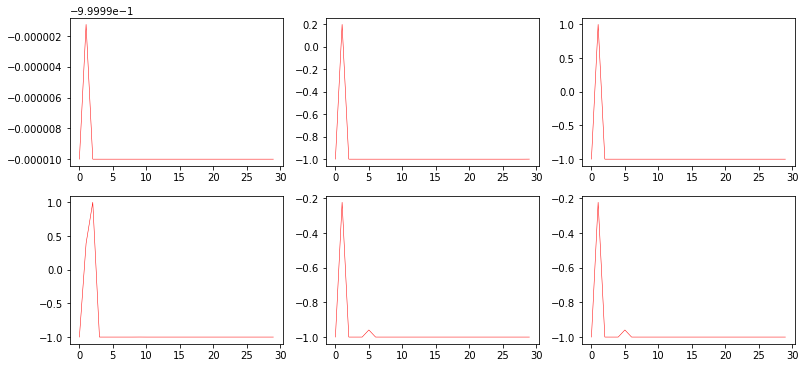

** step - 321 : gen loss= 23.48, disc loss= 0.00
** step - 322 : gen loss= 23.35, disc loss= 0.00
** step - 323 : gen loss= 23.58, disc loss= 0.00
Viewing samples at 324:
(28, 30, 1)


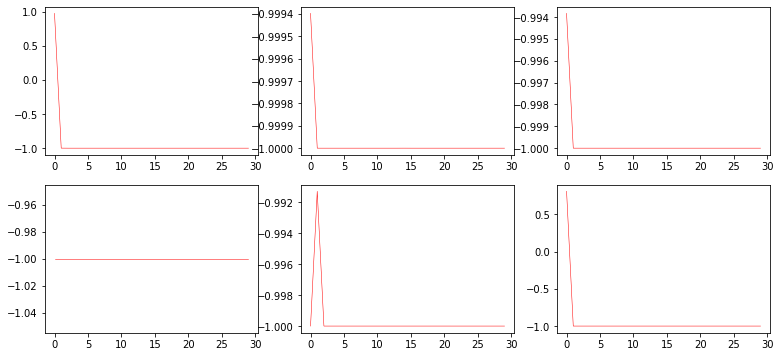

** step - 324 : gen loss= 23.52, disc loss= 0.00
Saved checkpoint for step 327: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-66
** step - 325 : gen loss= 23.82, disc loss= 0.00
** step - 326 : gen loss= 23.63, disc loss= 0.00
Viewing samples at 327:
(28, 30, 1)


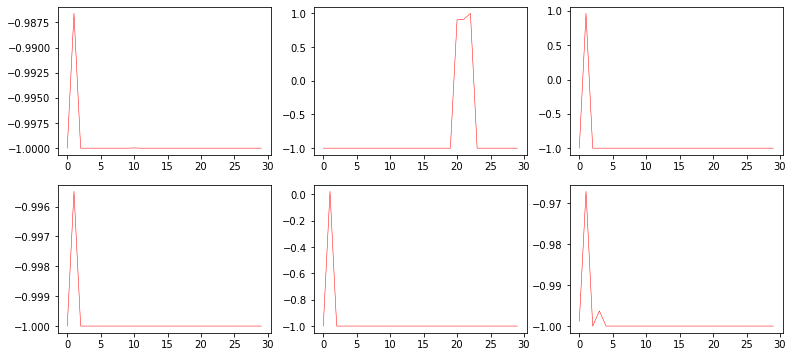

** step - 327 : gen loss= 23.57, disc loss= 0.00
** step - 328 : gen loss= 23.52, disc loss= 0.00
** step - 329 : gen loss= 23.44, disc loss= 0.00
Viewing samples at 330:
(28, 30, 1)


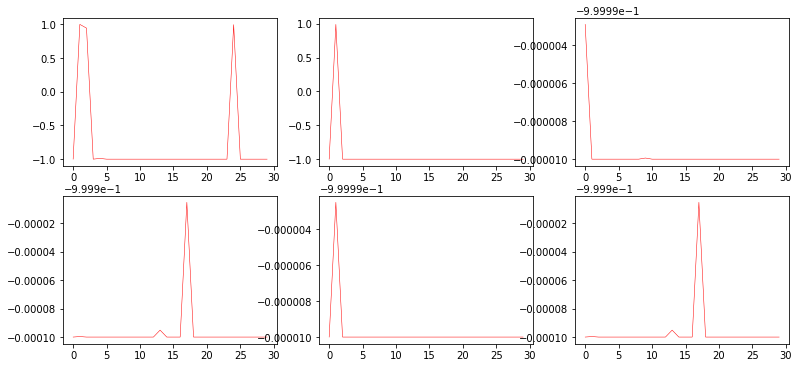

Saved checkpoint for step 332: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-67
** step - 330 : gen loss= 23.49, disc loss= 0.00
** step - 331 : gen loss= 23.69, disc loss= 0.00
** step - 332 : gen loss= 23.44, disc loss= 0.00
Viewing samples at 333:
(28, 30, 1)


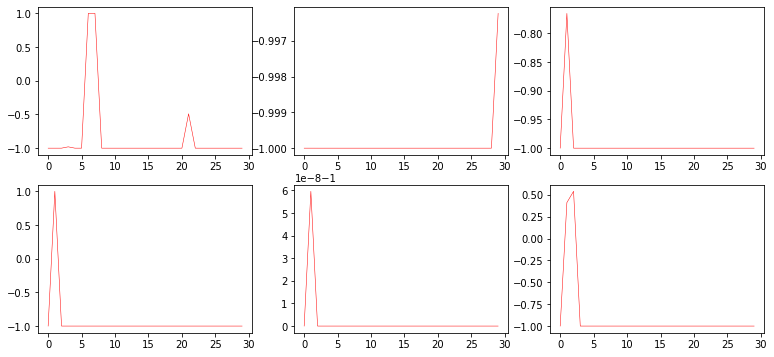

** step - 333 : gen loss= 23.51, disc loss= 0.00
** step - 334 : gen loss= 23.39, disc loss= 0.00
Saved checkpoint for step 337: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-68
** step - 335 : gen loss= 23.44, disc loss= 0.00
Viewing samples at 336:
(28, 30, 1)


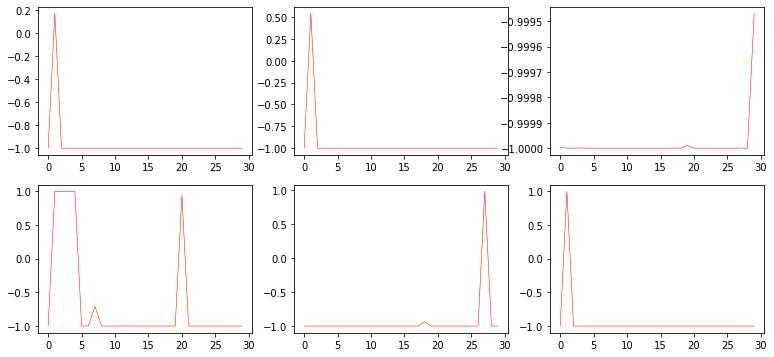

** step - 336 : gen loss= 23.82, disc loss= 0.00
** step - 337 : gen loss= 23.51, disc loss= 0.00
** step - 338 : gen loss= 23.54, disc loss= 0.00
Viewing samples at 339:
(28, 30, 1)


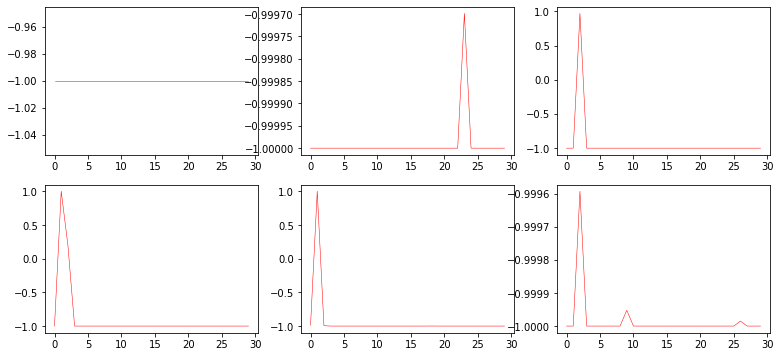

** step - 339 : gen loss= 23.96, disc loss= 0.00
Saved checkpoint for step 342: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-69
** step - 340 : gen loss= 23.40, disc loss= 0.00
** step - 341 : gen loss= 23.73, disc loss= 0.00
Viewing samples at 342:
(28, 30, 1)


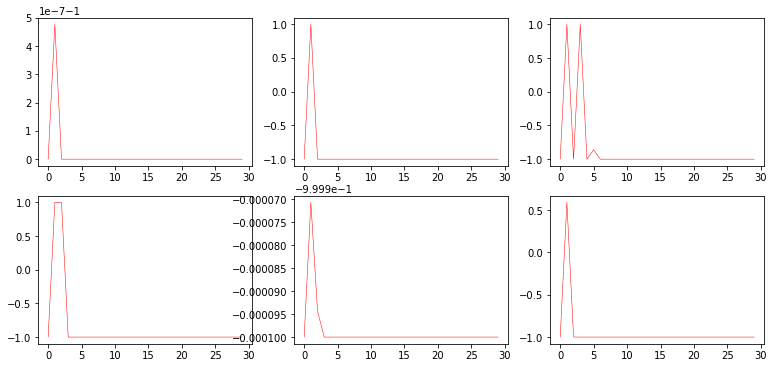

** step - 342 : gen loss= 23.59, disc loss= 0.00
** step - 343 : gen loss= 23.77, disc loss= 0.00
** step - 344 : gen loss= 23.56, disc loss= 0.00
Viewing samples at 345:
(28, 30, 1)


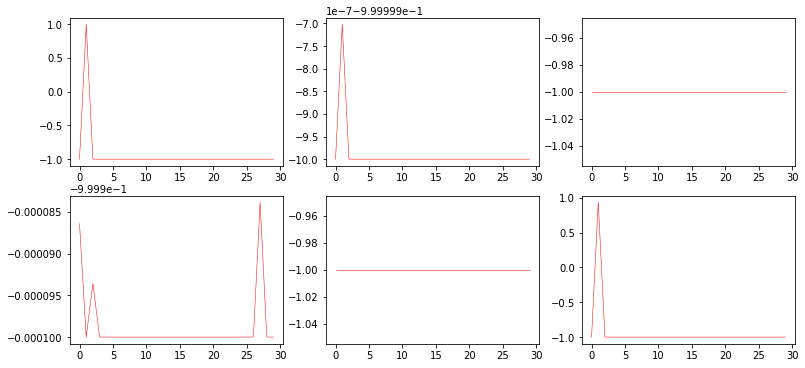

Saved checkpoint for step 347: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-70
** step - 345 : gen loss= 23.62, disc loss= 0.00
** step - 346 : gen loss= 23.48, disc loss= 0.00
** step - 347 : gen loss= 23.75, disc loss= 0.00
Viewing samples at 348:
(28, 30, 1)


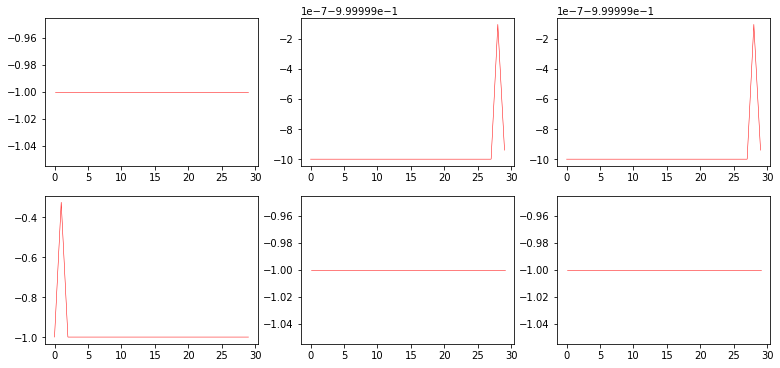

** step - 348 : gen loss= 23.45, disc loss= 0.00
** step - 349 : gen loss= 23.62, disc loss= 0.00
Saved checkpoint for step 352: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-71
** step - 350 : gen loss= 23.51, disc loss= 0.00
Viewing samples at 351:
(28, 30, 1)


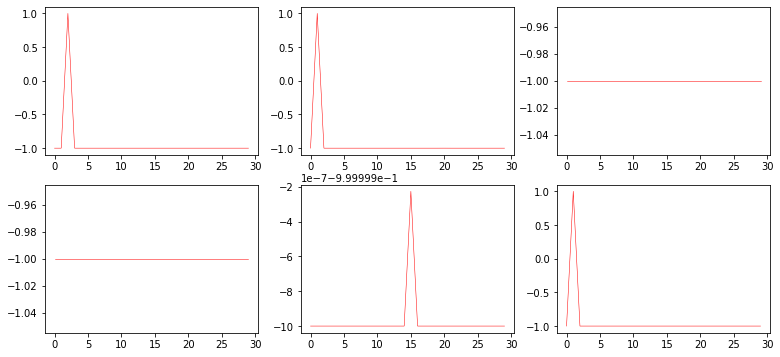

** step - 351 : gen loss= 23.94, disc loss= 0.00
** step - 352 : gen loss= 23.63, disc loss= 0.00
** step - 353 : gen loss= 23.53, disc loss= 0.00
Viewing samples at 354:
(28, 30, 1)


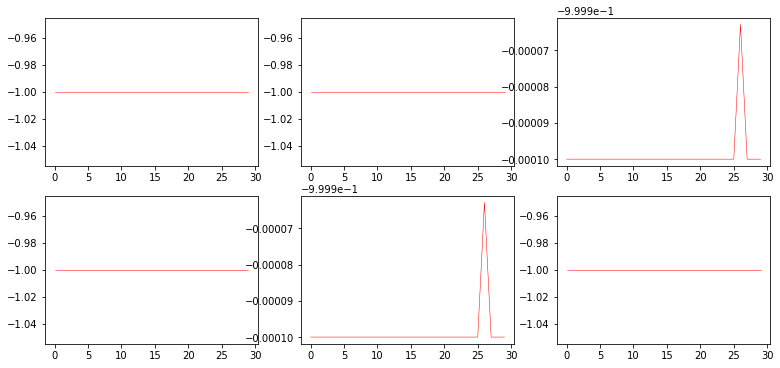

** step - 354 : gen loss= 23.58, disc loss= 0.00
Saved checkpoint for step 357: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-72
** step - 355 : gen loss= 23.61, disc loss= 0.00
** step - 356 : gen loss= 23.94, disc loss= 0.00
Viewing samples at 357:
(28, 30, 1)


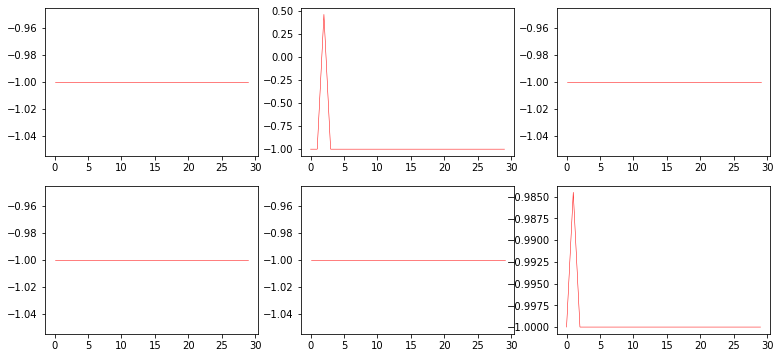

** step - 357 : gen loss= 23.77, disc loss= 0.00
** step - 358 : gen loss= 23.72, disc loss= 0.00
** step - 359 : gen loss= 23.81, disc loss= 0.00
Viewing samples at 360:
(28, 30, 1)


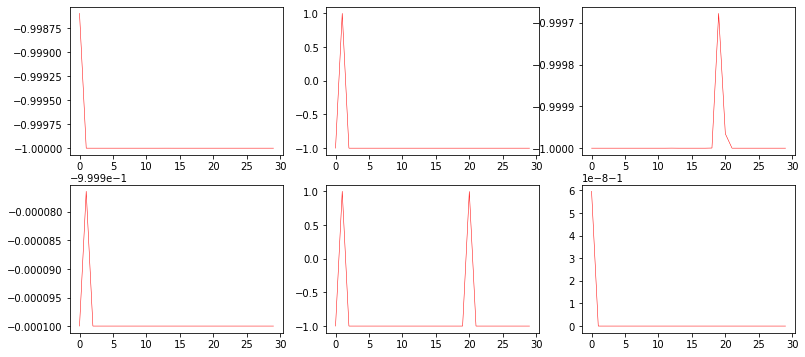

Saved checkpoint for step 362: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-73
** step - 360 : gen loss= 23.50, disc loss= 0.00
** step - 361 : gen loss= 23.50, disc loss= 0.00
** step - 362 : gen loss= 23.63, disc loss= 0.00
Viewing samples at 363:
(28, 30, 1)


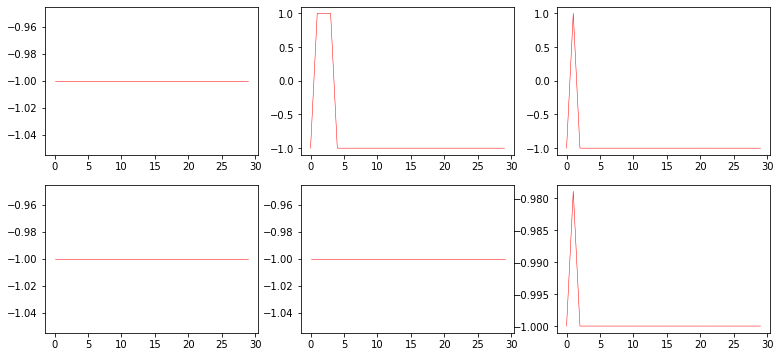

** step - 363 : gen loss= 23.74, disc loss= 0.00
** step - 364 : gen loss= 24.01, disc loss= 0.00
Saved checkpoint for step 367: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-74
** step - 365 : gen loss= 23.66, disc loss= 0.00
Viewing samples at 366:
(28, 30, 1)


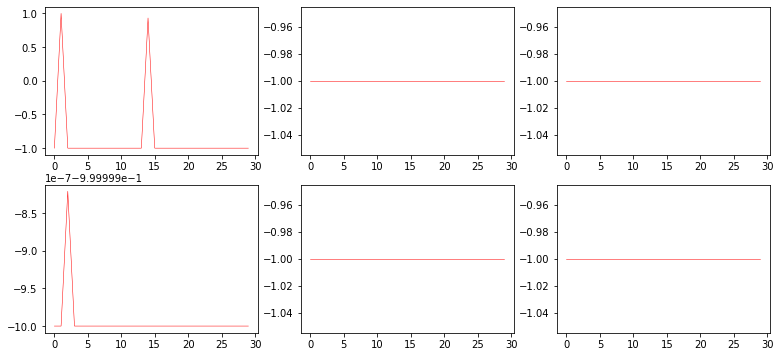

** step - 366 : gen loss= 23.64, disc loss= 0.00
** step - 367 : gen loss= 23.56, disc loss= 0.00
** step - 368 : gen loss= 23.83, disc loss= 0.00
Viewing samples at 369:
(28, 30, 1)


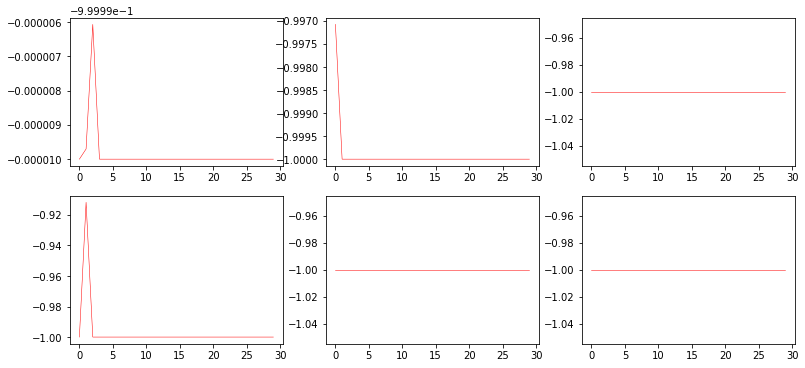

** step - 369 : gen loss= 23.63, disc loss= 0.00
Saved checkpoint for step 372: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-75
** step - 370 : gen loss= 23.83, disc loss= 0.00
** step - 371 : gen loss= 24.16, disc loss= 0.00
Viewing samples at 372:
(28, 30, 1)


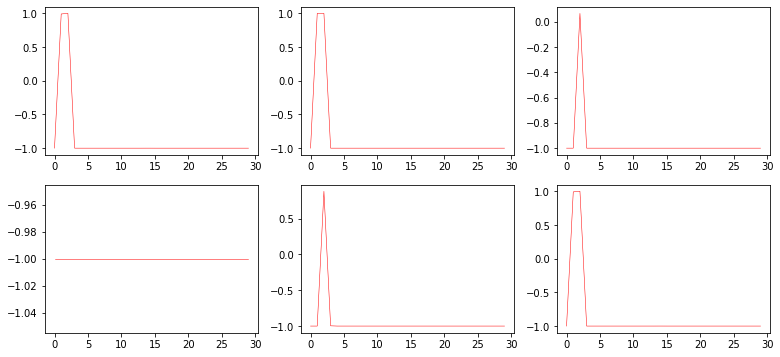

** step - 372 : gen loss= 23.66, disc loss= 0.00
** step - 373 : gen loss= 24.26, disc loss= 0.00
** step - 374 : gen loss= 24.13, disc loss= 0.00
Viewing samples at 375:
(28, 30, 1)


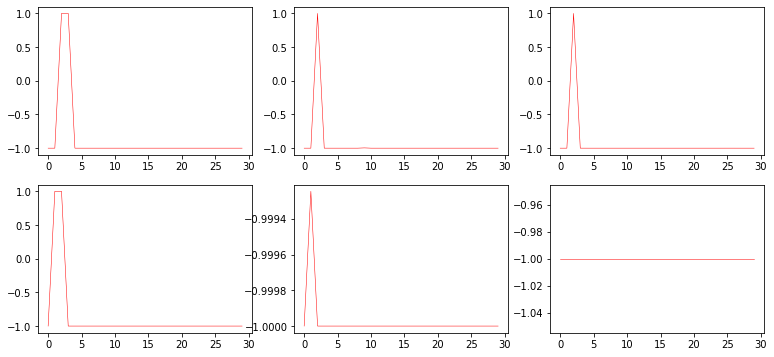

Saved checkpoint for step 377: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-76
** step - 375 : gen loss= 23.97, disc loss= 0.00
** step - 376 : gen loss= 24.24, disc loss= 0.00
** step - 377 : gen loss= 23.75, disc loss= 0.00
Viewing samples at 378:
(28, 30, 1)


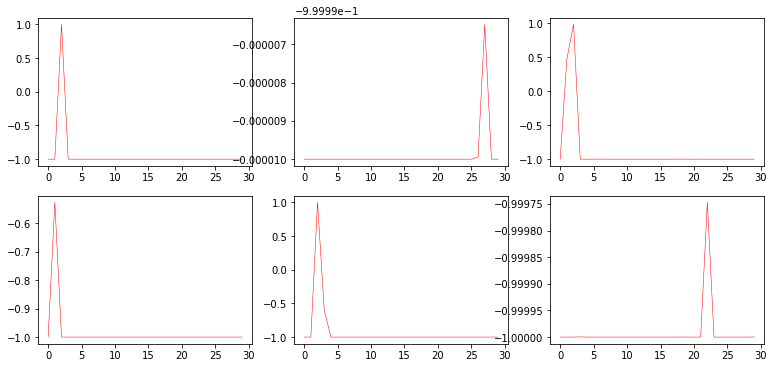

** step - 378 : gen loss= 23.83, disc loss= 0.00
** step - 379 : gen loss= 23.83, disc loss= 0.00
Saved checkpoint for step 382: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-77
** step - 380 : gen loss= 23.94, disc loss= 0.00
Viewing samples at 381:
(28, 30, 1)


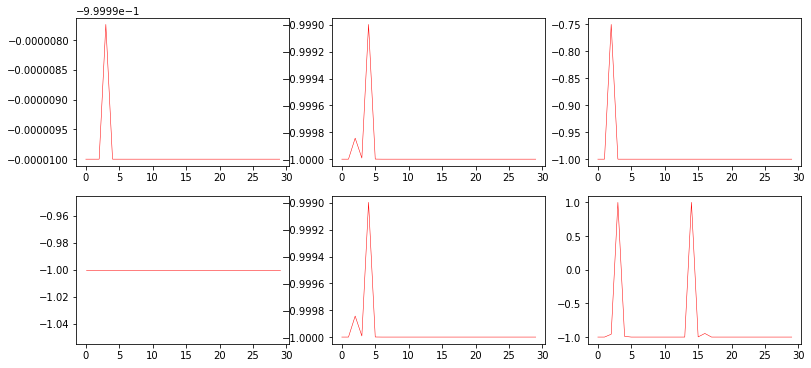

** step - 381 : gen loss= 23.86, disc loss= 0.00
** step - 382 : gen loss= 23.78, disc loss= 0.00
** step - 383 : gen loss= 23.91, disc loss= 0.00
Viewing samples at 384:
(28, 30, 1)


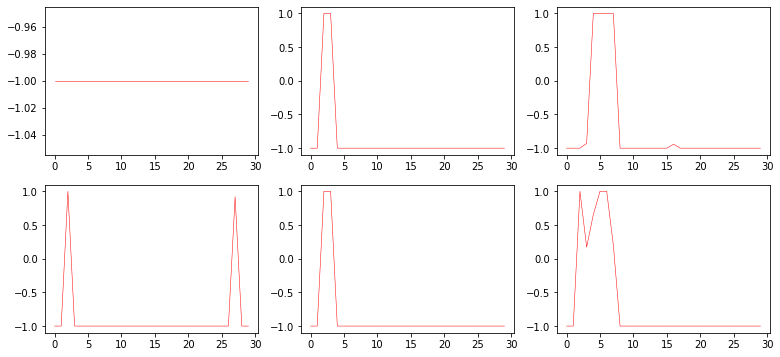

** step - 384 : gen loss= 24.10, disc loss= 0.00
Saved checkpoint for step 387: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-78
** step - 385 : gen loss= 23.96, disc loss= 0.00
** step - 386 : gen loss= 24.11, disc loss= 0.00
Viewing samples at 387:
(28, 30, 1)


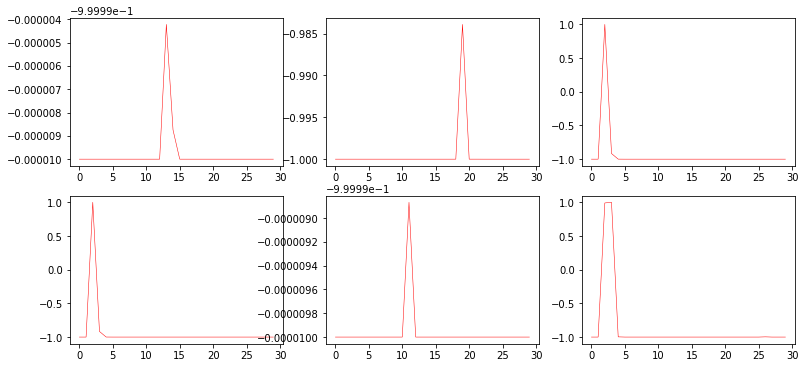

** step - 387 : gen loss= 24.15, disc loss= 0.00
** step - 388 : gen loss= 24.10, disc loss= 0.00
** step - 389 : gen loss= 24.19, disc loss= 0.00
Viewing samples at 390:
(28, 30, 1)


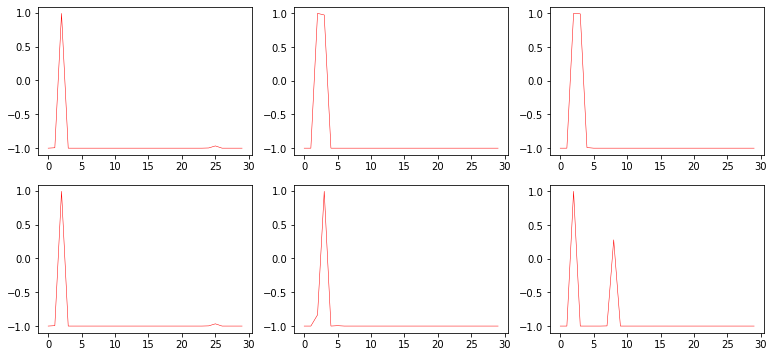

Saved checkpoint for step 392: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-79
** step - 390 : gen loss= 24.13, disc loss= 0.00
** step - 391 : gen loss= 24.02, disc loss= 0.00
** step - 392 : gen loss= 24.22, disc loss= 0.00
Viewing samples at 393:
(28, 30, 1)


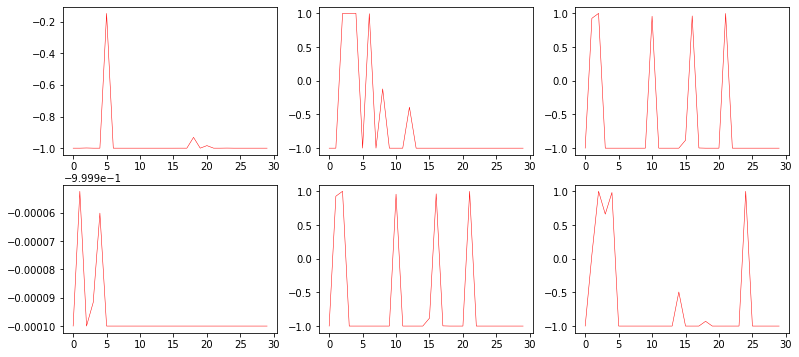

** step - 393 : gen loss= 23.98, disc loss= 0.00
** step - 394 : gen loss= 24.20, disc loss= 0.00
Saved checkpoint for step 397: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-80
** step - 395 : gen loss= 24.27, disc loss= 0.00
Viewing samples at 396:
(28, 30, 1)


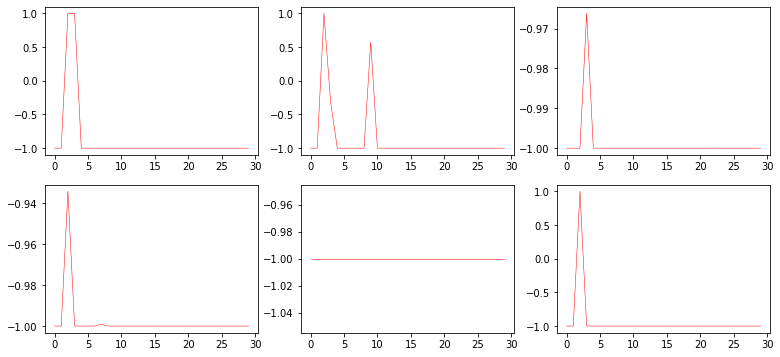

** step - 396 : gen loss= 23.94, disc loss= 0.00
** step - 397 : gen loss= 23.88, disc loss= 0.00
** step - 398 : gen loss= 24.21, disc loss= 0.00
Viewing samples at 399:
(28, 30, 1)


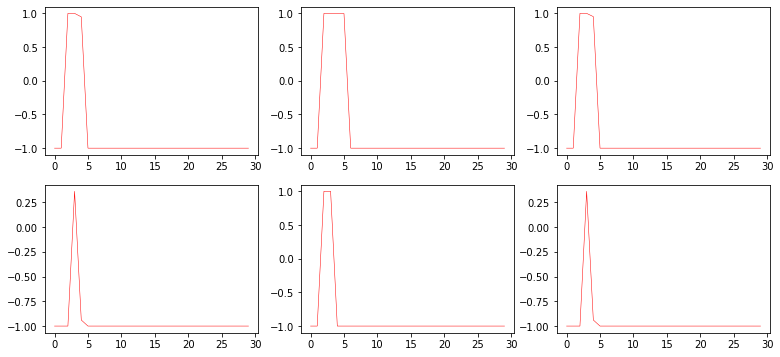

** step - 399 : gen loss= 23.94, disc loss= 0.00
Saved checkpoint for step 402: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-81
** step - 400 : gen loss= 24.28, disc loss= 0.00
** step - 401 : gen loss= 24.19, disc loss= 0.00
Viewing samples at 402:
(28, 30, 1)


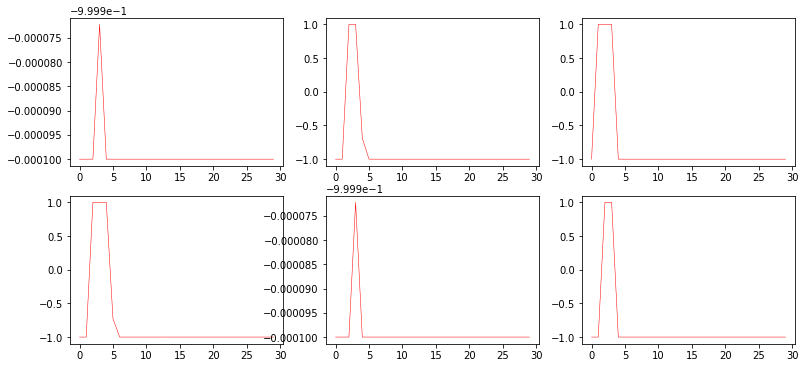

** step - 402 : gen loss= 24.10, disc loss= 0.00
** step - 403 : gen loss= 23.97, disc loss= 0.00
** step - 404 : gen loss= 23.79, disc loss= 0.00
Viewing samples at 405:
(28, 30, 1)


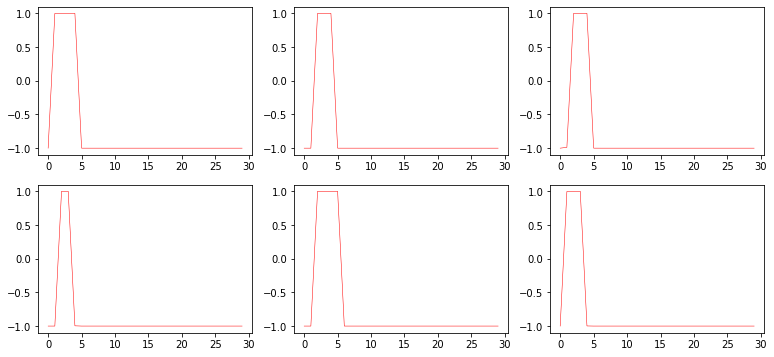

Saved checkpoint for step 407: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-82
** step - 405 : gen loss= 24.10, disc loss= 0.00
** step - 406 : gen loss= 24.20, disc loss= 0.00
** step - 407 : gen loss= 24.53, disc loss= 0.00
Viewing samples at 408:
(28, 30, 1)


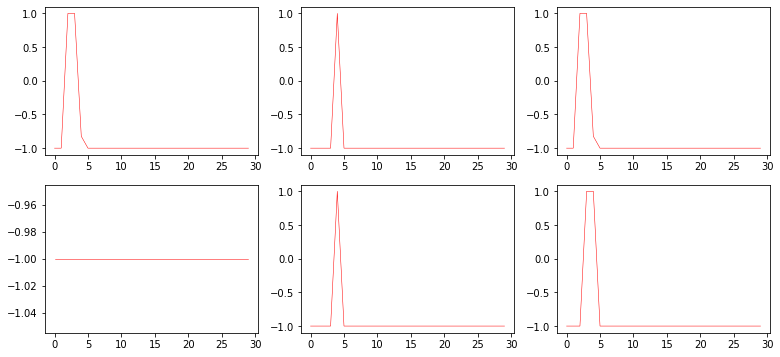

** step - 408 : gen loss= 24.22, disc loss= 0.00
** step - 409 : gen loss= 24.39, disc loss= 0.00
Saved checkpoint for step 412: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-83
** step - 410 : gen loss= 24.17, disc loss= 0.00
Viewing samples at 411:
(28, 30, 1)


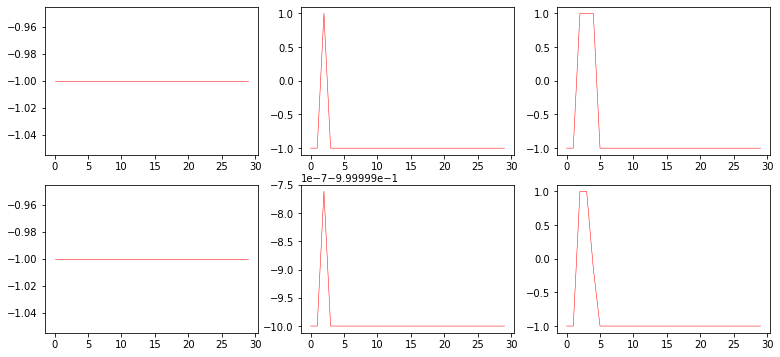

** step - 411 : gen loss= 24.24, disc loss= 0.00
** step - 412 : gen loss= 24.20, disc loss= 0.00
** step - 413 : gen loss= 23.99, disc loss= 0.00
Viewing samples at 414:
(28, 30, 1)


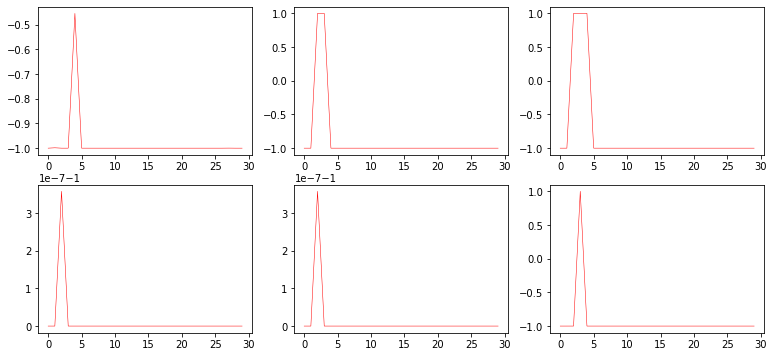

** step - 414 : gen loss= 23.96, disc loss= 0.00
Saved checkpoint for step 417: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-84
** step - 415 : gen loss= 24.43, disc loss= 0.00
** step - 416 : gen loss= 23.90, disc loss= 0.00
Viewing samples at 417:
(28, 30, 1)


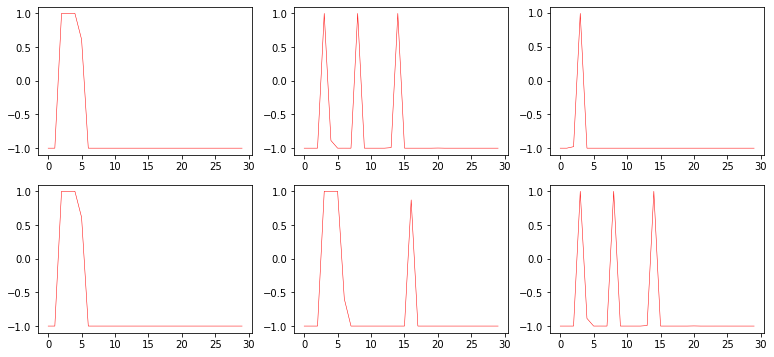

** step - 417 : gen loss= 24.14, disc loss= 0.00
** step - 418 : gen loss= 24.14, disc loss= 0.00
** step - 419 : gen loss= 23.95, disc loss= 0.00
Viewing samples at 420:
(28, 30, 1)


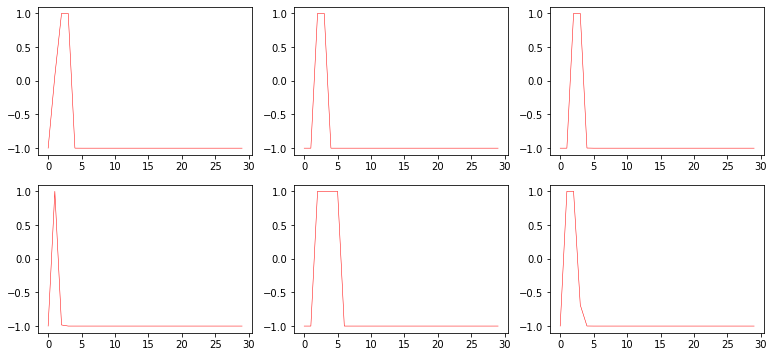

Saved checkpoint for step 422: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-85
** step - 420 : gen loss= 24.28, disc loss= 0.00
** step - 421 : gen loss= 24.44, disc loss= 0.00
** step - 422 : gen loss= 24.03, disc loss= 0.00
Viewing samples at 423:
(28, 30, 1)


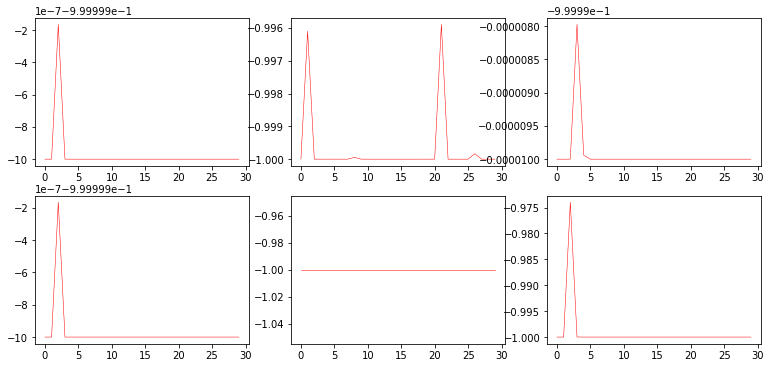

** step - 423 : gen loss= 24.20, disc loss= 0.00
** step - 424 : gen loss= 24.50, disc loss= 0.00
Saved checkpoint for step 427: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-86
** step - 425 : gen loss= 24.34, disc loss= 0.00
Viewing samples at 426:
(28, 30, 1)


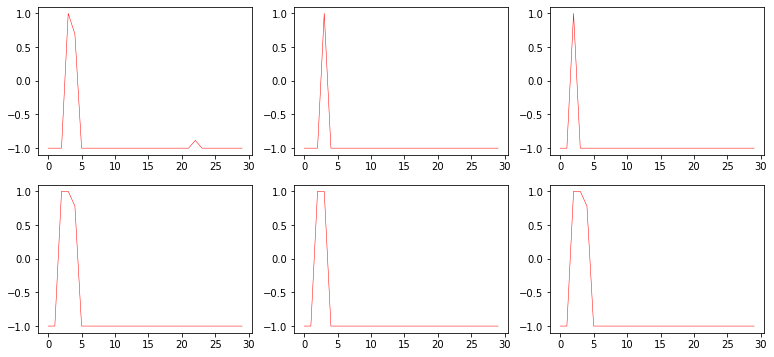

** step - 426 : gen loss= 24.07, disc loss= 0.00
** step - 427 : gen loss= 24.13, disc loss= 0.00
** step - 428 : gen loss= 24.37, disc loss= 0.00
Viewing samples at 429:
(28, 30, 1)


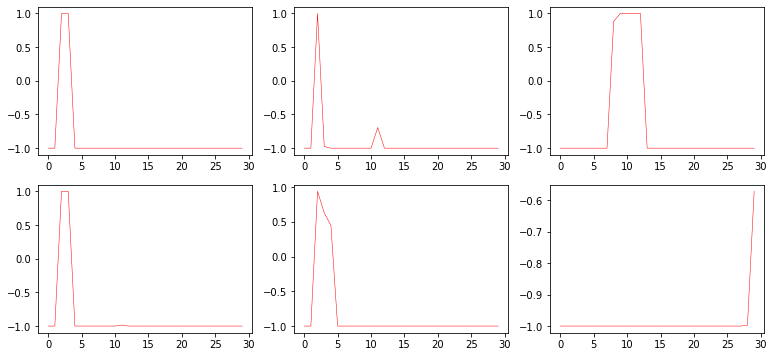

** step - 429 : gen loss= 24.02, disc loss= 0.00
Saved checkpoint for step 432: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-87
** step - 430 : gen loss= 24.25, disc loss= 0.00
** step - 431 : gen loss= 24.07, disc loss= 0.00
Viewing samples at 432:
(28, 30, 1)


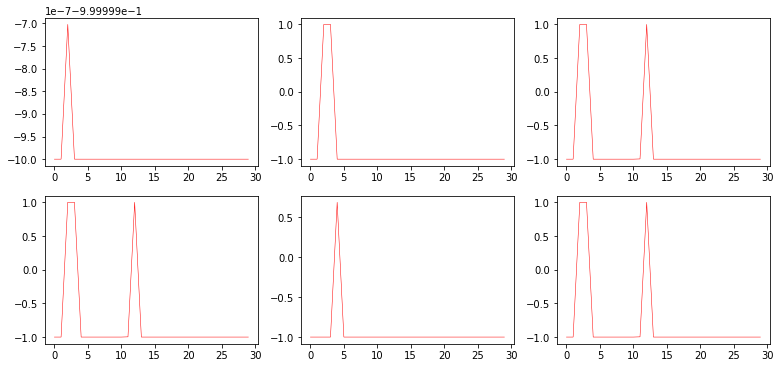

** step - 432 : gen loss= 24.19, disc loss= 0.00
** step - 433 : gen loss= 24.34, disc loss= 0.00
** step - 434 : gen loss= 24.09, disc loss= 0.00
Viewing samples at 435:
(28, 30, 1)


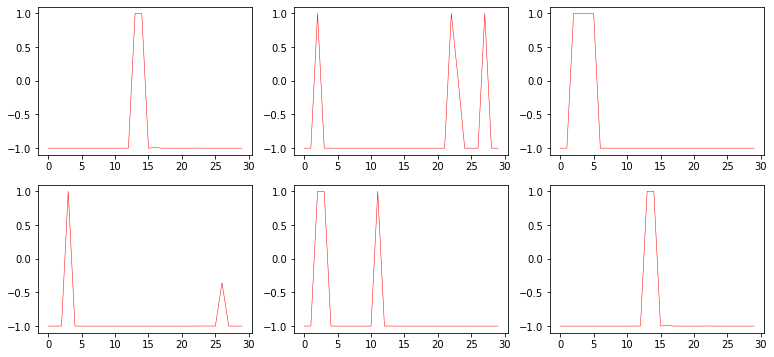

Saved checkpoint for step 437: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-88
** step - 435 : gen loss= 24.53, disc loss= 0.00
** step - 436 : gen loss= 24.23, disc loss= 0.00
** step - 437 : gen loss= 24.11, disc loss= 0.00
Viewing samples at 438:
(28, 30, 1)


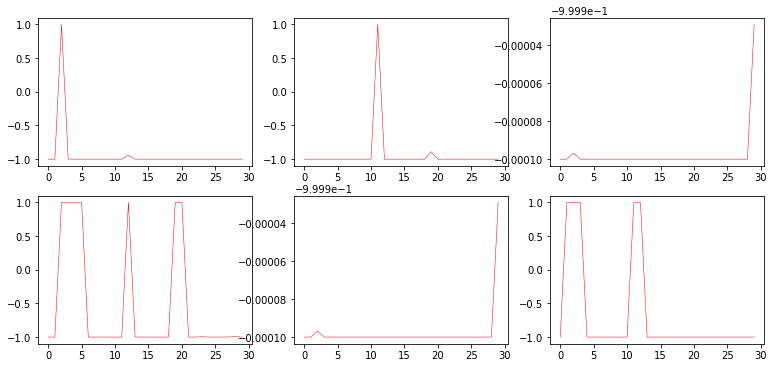

** step - 438 : gen loss= 24.26, disc loss= 0.00
** step - 439 : gen loss= 24.33, disc loss= 0.00
Saved checkpoint for step 442: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-89
** step - 440 : gen loss= 24.01, disc loss= 0.00
Viewing samples at 441:
(28, 30, 1)


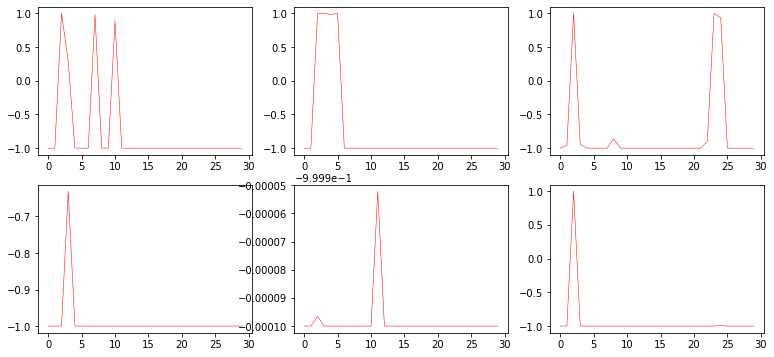

** step - 441 : gen loss= 24.27, disc loss= 0.00
** step - 442 : gen loss= 24.09, disc loss= 0.00
** step - 443 : gen loss= 24.18, disc loss= 0.00
Viewing samples at 444:
(28, 30, 1)


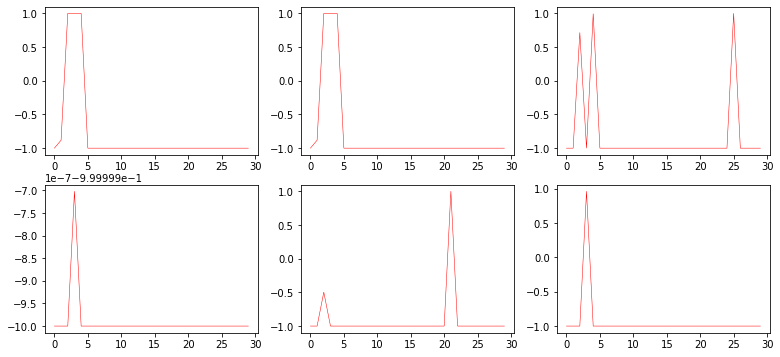

** step - 444 : gen loss= 24.70, disc loss= 0.00
Saved checkpoint for step 447: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-90
** step - 445 : gen loss= 23.99, disc loss= 0.00
** step - 446 : gen loss= 24.18, disc loss= 0.00
Viewing samples at 447:
(28, 30, 1)


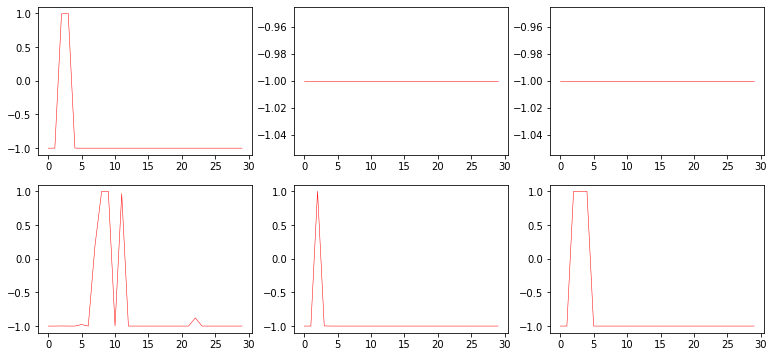

** step - 447 : gen loss= 24.30, disc loss= 0.00
** step - 448 : gen loss= 24.19, disc loss= 0.00
** step - 449 : gen loss= 24.40, disc loss= 0.00
Viewing samples at 450:
(28, 30, 1)


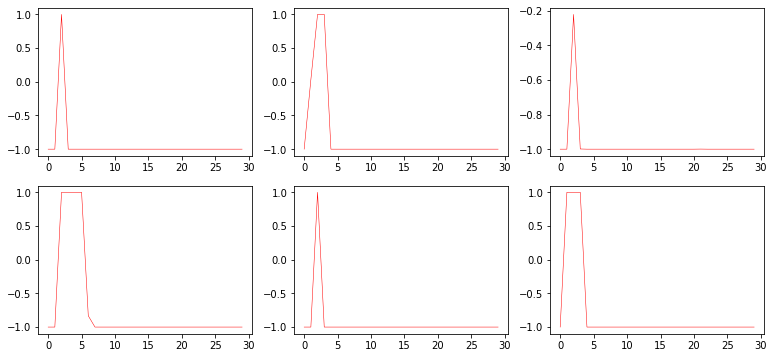

Saved checkpoint for step 452: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-91
** step - 450 : gen loss= 24.17, disc loss= 0.00
** step - 451 : gen loss= 24.21, disc loss= 0.00
** step - 452 : gen loss= 24.22, disc loss= 0.00
Viewing samples at 453:
(28, 30, 1)


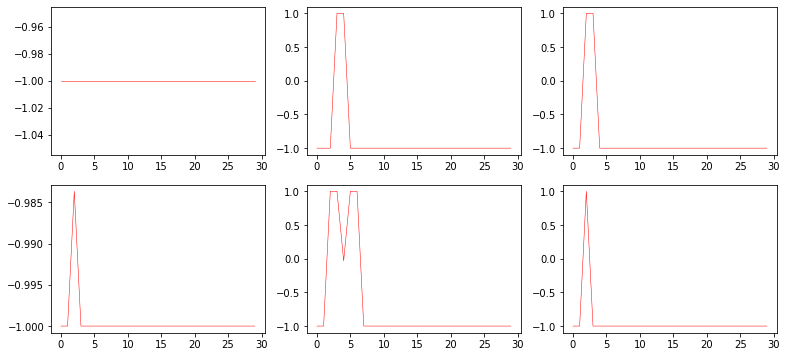

** step - 453 : gen loss= 24.11, disc loss= 0.00
** step - 454 : gen loss= 24.15, disc loss= 0.00
Saved checkpoint for step 457: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-92
** step - 455 : gen loss= 24.02, disc loss= 0.00
Viewing samples at 456:
(28, 30, 1)


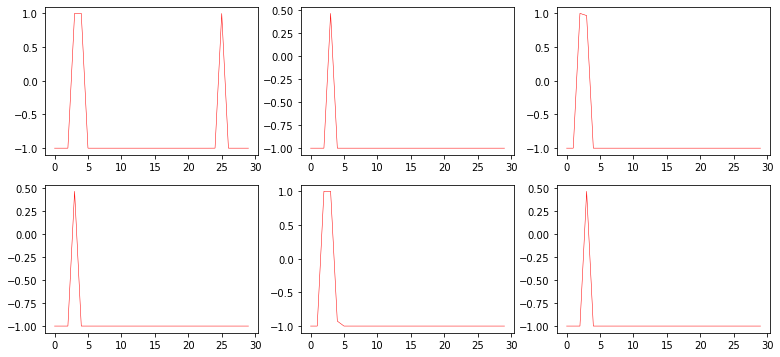

** step - 456 : gen loss= 24.20, disc loss= 0.00
** step - 457 : gen loss= 24.17, disc loss= 0.00
** step - 458 : gen loss= 24.33, disc loss= 0.00
Viewing samples at 459:
(28, 30, 1)


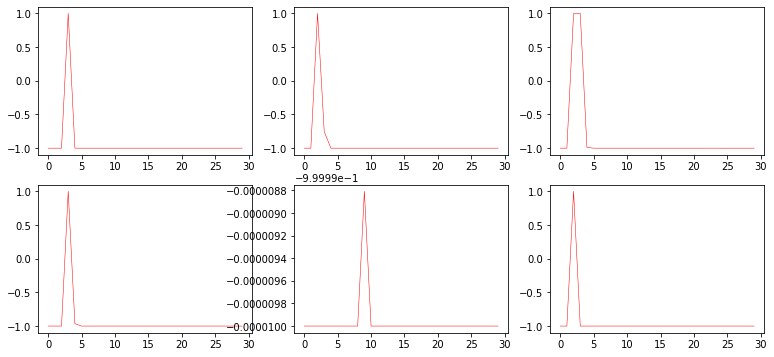

** step - 459 : gen loss= 24.05, disc loss= 0.00
Saved checkpoint for step 462: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-93
** step - 460 : gen loss= 24.30, disc loss= 0.00
** step - 461 : gen loss= 24.16, disc loss= 0.00
Viewing samples at 462:
(28, 30, 1)


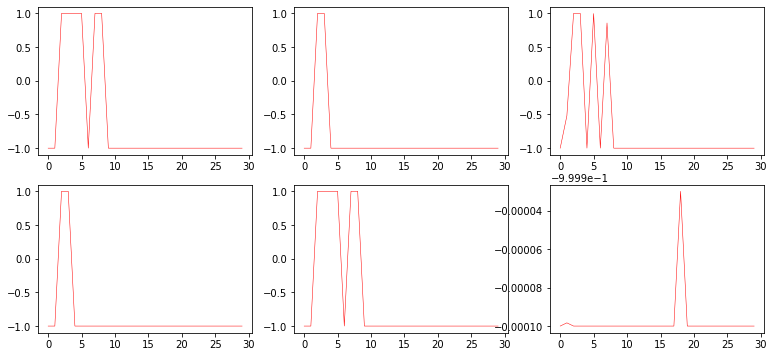

** step - 462 : gen loss= 24.37, disc loss= 0.00
** step - 463 : gen loss= 24.53, disc loss= 0.00
** step - 464 : gen loss= 24.19, disc loss= 0.00
Viewing samples at 465:
(28, 30, 1)


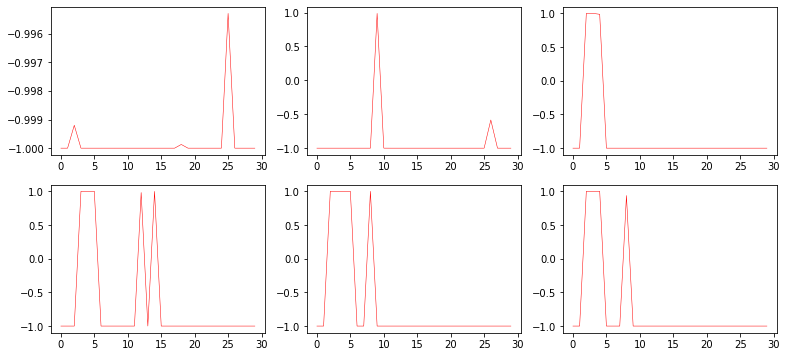

Saved checkpoint for step 467: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-94
** step - 465 : gen loss= 24.29, disc loss= 0.00
** step - 466 : gen loss= 24.41, disc loss= 0.00
** step - 467 : gen loss= 24.38, disc loss= 0.00
Viewing samples at 468:
(28, 30, 1)


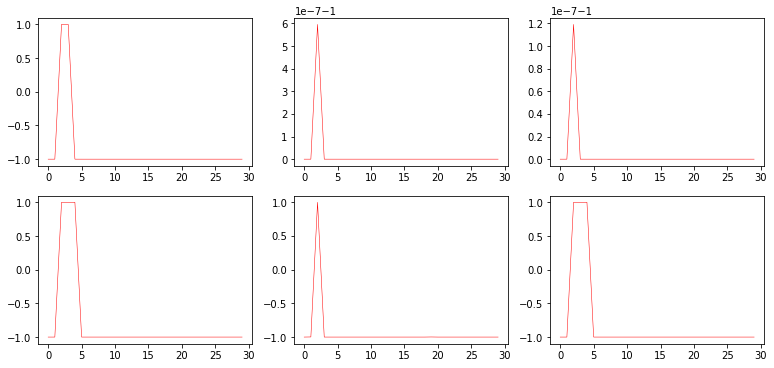

** step - 468 : gen loss= 24.09, disc loss= 0.00
** step - 469 : gen loss= 24.49, disc loss= 0.00
Saved checkpoint for step 472: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-95
** step - 470 : gen loss= 24.38, disc loss= 0.00
Viewing samples at 471:
(28, 30, 1)


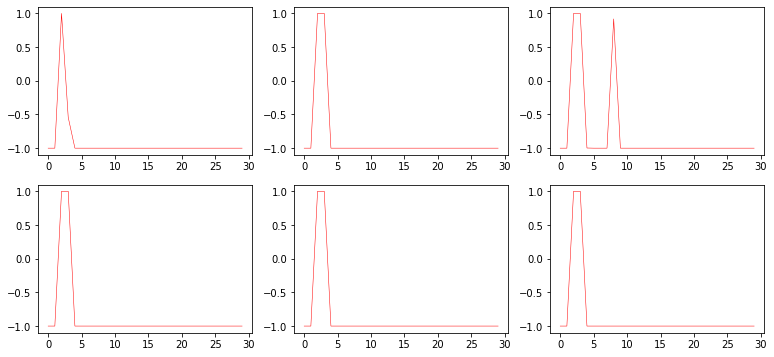

** step - 471 : gen loss= 24.20, disc loss= 0.00
** step - 472 : gen loss= 24.27, disc loss= 0.00
** step - 473 : gen loss= 24.06, disc loss= 0.00
Viewing samples at 474:
(28, 30, 1)


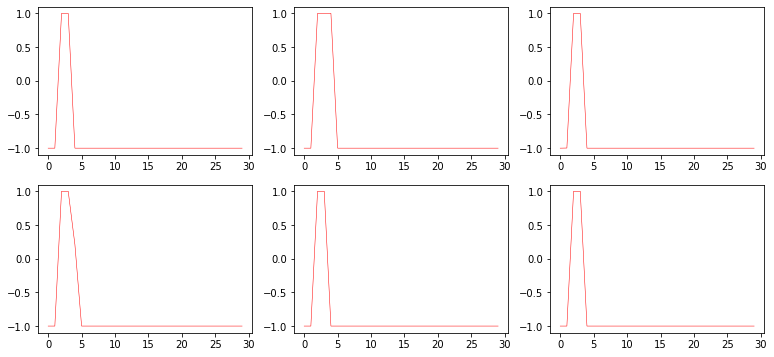

** step - 474 : gen loss= 24.37, disc loss= 0.00
Saved checkpoint for step 477: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-96
** step - 475 : gen loss= 24.11, disc loss= 0.00
** step - 476 : gen loss= 24.10, disc loss= 0.00
Viewing samples at 477:
(28, 30, 1)


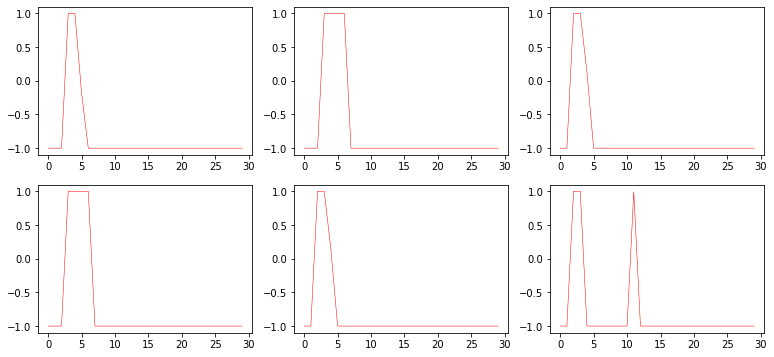

** step - 477 : gen loss= 24.09, disc loss= 0.00
** step - 478 : gen loss= 24.02, disc loss= 0.00
** step - 479 : gen loss= 24.23, disc loss= 0.00
Viewing samples at 480:
(28, 30, 1)


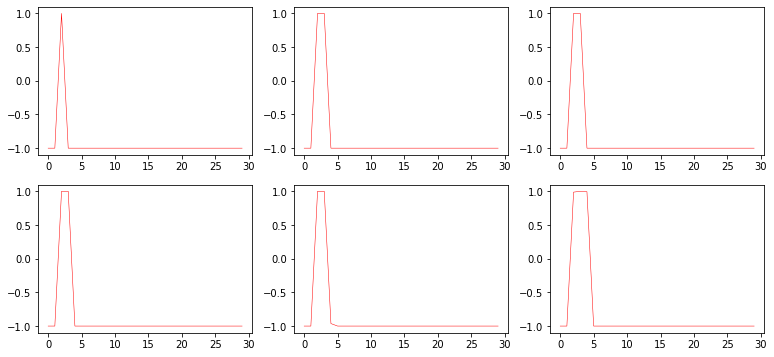

Saved checkpoint for step 482: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-97
** step - 480 : gen loss= 24.18, disc loss= 0.00
** step - 481 : gen loss= 24.47, disc loss= 0.00
** step - 482 : gen loss= 24.50, disc loss= 0.00
Viewing samples at 483:
(28, 30, 1)


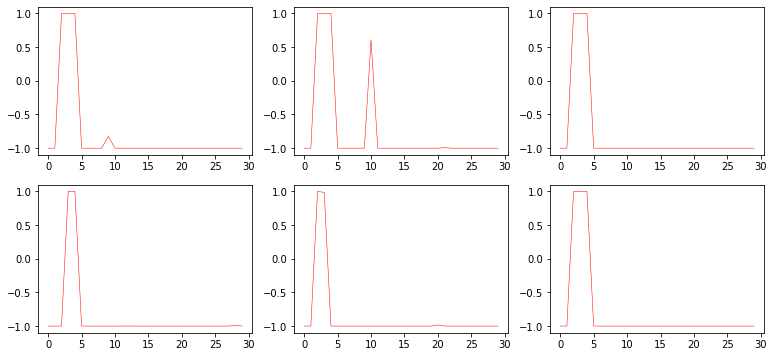

** step - 483 : gen loss= 24.46, disc loss= 0.00
** step - 484 : gen loss= 24.44, disc loss= 0.00
Saved checkpoint for step 487: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-98
** step - 485 : gen loss= 24.25, disc loss= 0.00
Viewing samples at 486:
(28, 30, 1)


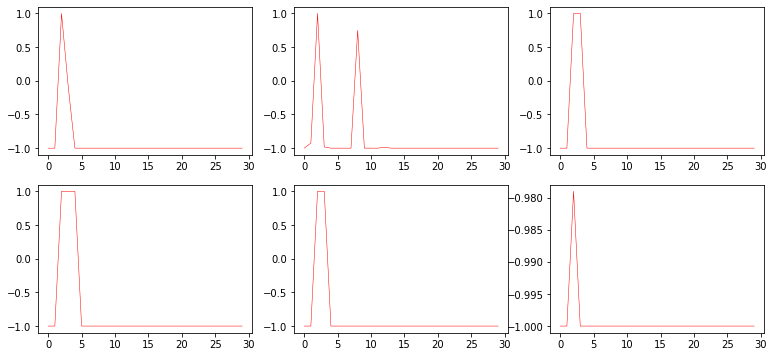

** step - 486 : gen loss= 24.32, disc loss= 0.00
** step - 487 : gen loss= 24.27, disc loss= 0.00
** step - 488 : gen loss= 24.31, disc loss= 0.00
Viewing samples at 489:
(28, 30, 1)


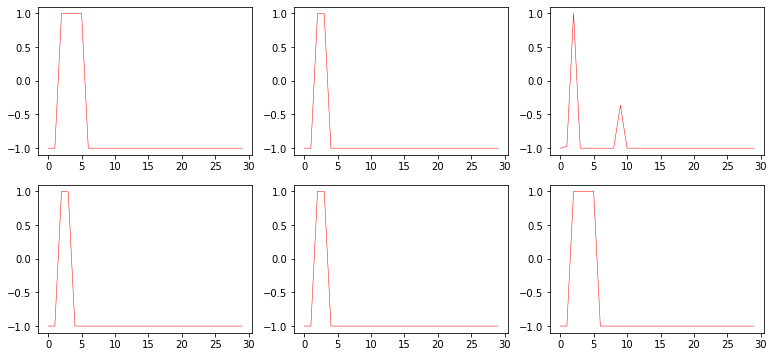

** step - 489 : gen loss= 24.33, disc loss= 0.00
Saved checkpoint for step 492: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-99
** step - 490 : gen loss= 24.35, disc loss= 0.00
** step - 491 : gen loss= 24.41, disc loss= 0.00
Viewing samples at 492:
(28, 30, 1)


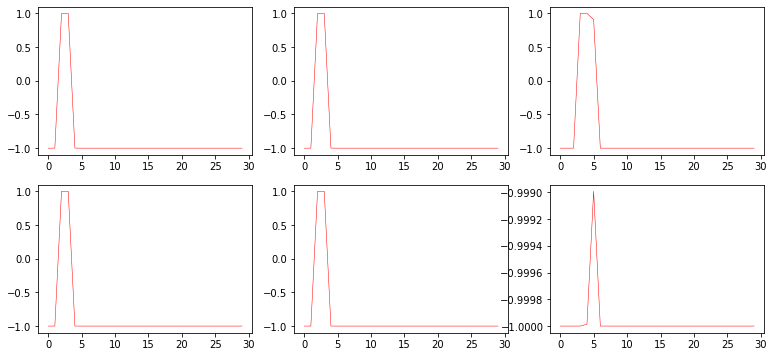

** step - 492 : gen loss= 24.36, disc loss= 0.00
** step - 493 : gen loss= 24.25, disc loss= 0.00
** step - 494 : gen loss= 24.40, disc loss= 0.00
Viewing samples at 495:
(28, 30, 1)


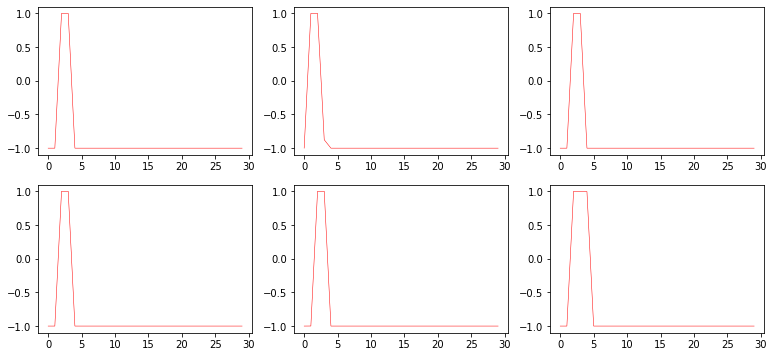

Saved checkpoint for step 497: /data/SHARPS/gann-proj/model_sine_40_0.05_28_100/ckpt-100
** step - 495 : gen loss= 24.61, disc loss= 0.00
** step - 496 : gen loss= 24.53, disc loss= 0.00
** step - 497 : gen loss= 24.69, disc loss= 0.00
Viewing samples at 498:
(28, 30, 1)


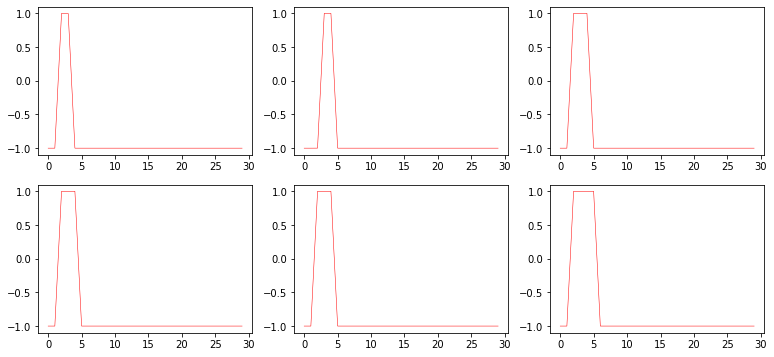

** step - 498 : gen loss= 24.69, disc loss= 0.00
** step - 499 : gen loss= 24.39, disc loss= 0.00


In [6]:
gann.train()